In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('phl_exoplanet_catalog_2019.csv')

# Filter based on the criteria
filtered_data = dataset[
    (dataset['P_TYPE_TEMP'] == 'Warm') &
    (dataset['P_TYPE'].isin(['Terran', 'Superterran'])) &
    (dataset['S_TYPE_TEMP'].isin(['G', 'K', 'M']))
]

# Display the result
print(f"Number of suitable planets: {len(filtered_data)}")
print(filtered_data[['P_NAME', 'P_TYPE', 'P_TYPE_TEMP', 'S_TYPE_TEMP']])


Number of suitable planets: 53
                  P_NAME       P_TYPE P_TYPE_TEMP S_TYPE_TEMP
137             GJ 163 c  Superterran        Warm           M
140             GJ 273 b       Terran        Warm           M
151            GJ 3293 d  Superterran        Warm           M
153            GJ 3323 b       Terran        Warm           M
159             GJ 357 d  Superterran        Warm           M
177           GJ 667 C c       Terran        Warm           M
178           GJ 667 C e       Terran        Warm           M
179           GJ 667 C f       Terran        Warm           M
189             GJ 832 c  Superterran        Warm           M
740           HD 40307 g  Superterran        Warm           K
1029             K2-18 b  Superterran        Warm           M
1182          K2-288 B b  Superterran        Warm           M
1193              K2-3 d  Superterran        Warm           M
1253             K2-72 e       Terran        Warm           M
1275              K2-9 b  Superterran  

<ipython-input-2-f557f17af060>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x='P_TYPE', palette='coolwarm')


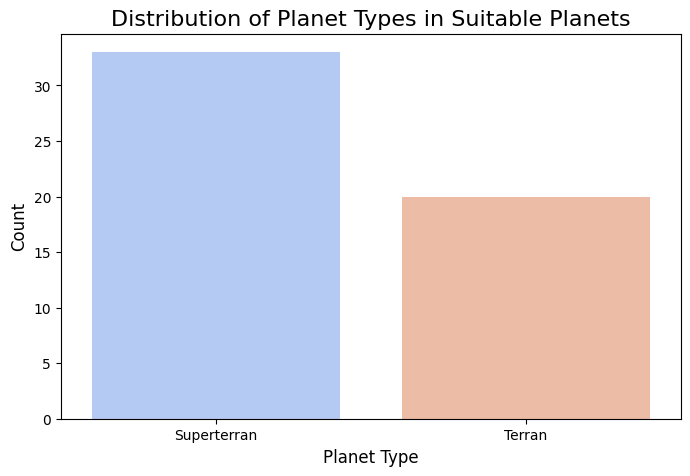

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16

Accuracy: 0.88


<ipython-input-2-f557f17af060>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importances, palette='viridis')


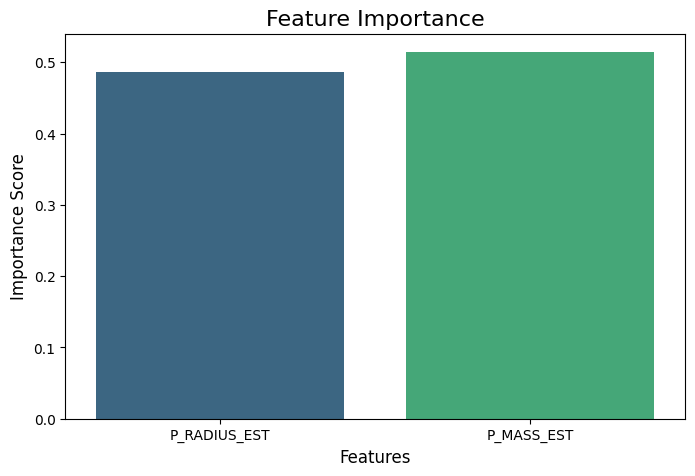

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
dataset = pd.read_csv('phl_exoplanet_catalog_2019.csv')

# Filter the data
filtered_data = dataset[
    (dataset['P_TYPE_TEMP'] == 'Warm') &
    (dataset['P_TYPE'].isin(['Terran', 'Superterran'])) &
    (dataset['S_TYPE_TEMP'].isin(['G', 'K', 'M']))
]

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=filtered_data, x='P_TYPE', palette='coolwarm')
plt.title('Distribution of Planet Types in Suitable Planets', fontsize=16)
plt.xlabel('Planet Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Prepare data for ML
X = filtered_data[['P_RADIUS_EST', 'P_MASS_EST']]  # Features (can add more)
y = filtered_data['P_HABITABLE']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Feature Importance Plot
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=importances, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.show()


<ipython-input-3-092b6cfd1e45>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x='P_TYPE', palette='coolwarm')


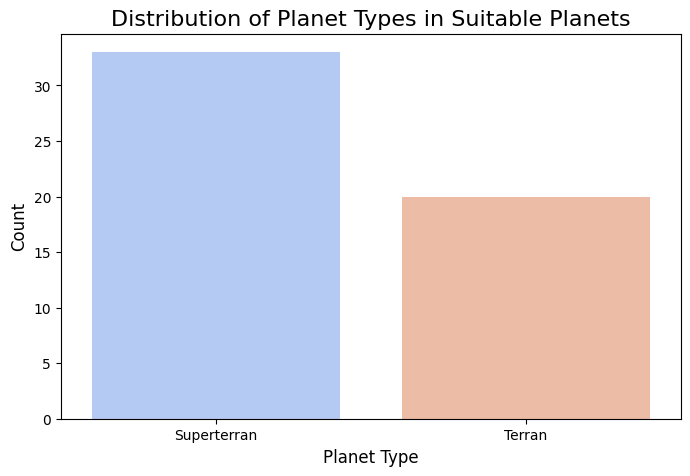

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
dataset = pd.read_csv('phl_exoplanet_catalog_2019.csv')

# Filter the data
filtered_data = dataset[
    (dataset['P_TYPE_TEMP'] == 'Warm') &
    (dataset['P_TYPE'].isin(['Terran', 'Superterran'])) &
    (dataset['S_TYPE_TEMP'].isin(['G', 'K', 'M']))
]

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=filtered_data, x='P_TYPE', palette='coolwarm')
plt.title('Distribution of Planet Types in Suitable Planets', fontsize=16)
plt.xlabel('Planet Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()



Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16


KNN Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16


Extra Trees Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94   

<ipython-input-4-d2155502236f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='coolwarm')


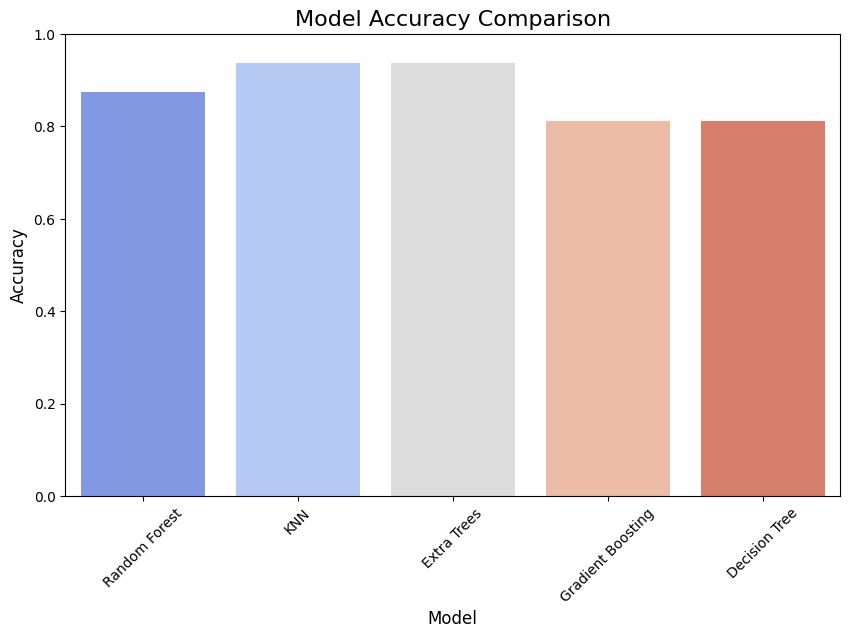

<ipython-input-4-d2155502236f>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importances, palette='viridis')


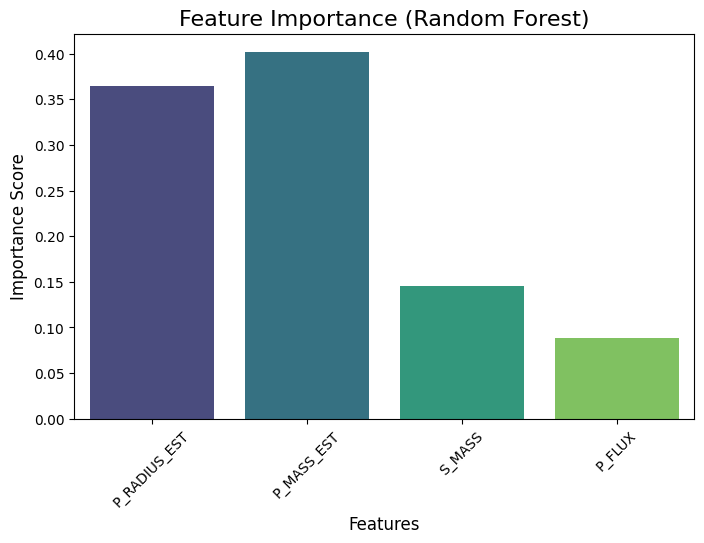

In [ ]:

# Prepare data for ML
X = filtered_data[['P_RADIUS_EST', 'P_MASS_EST', 'S_MASS', 'P_FLUX']]  # Features
y = filtered_data['P_HABITABLE']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imputation - Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': accuracy})
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

# Compare Model Performance
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='coolwarm')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)  # Apply 45-degree rotation to x-axis labels
plt.ylim(0, 1)
plt.show()

# Feature Importance for Random Forest
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=importances, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45)  # Apply 45-degree rotation to x-axis labels
plt.show()


In [ ]:
# Load the new dataset for prediction
new_data = pd.read_csv('/content/phl_exoplanet_catalog_2019.csv')

# Filter the new data similarly to the training data
new_filtered_data = new_data[
    (new_data['P_TYPE_TEMP'] == 'Warm') &
    (new_data['P_TYPE'].isin(['Terran', 'Superterran'])) &
    (new_data['S_TYPE_TEMP'].isin(['G', 'K', 'M']))
]

# Prepare new data for prediction
X_new = new_filtered_data[['P_RADIUS_EST', 'P_MASS_EST', 'S_MASS', 'P_FLUX']]  # Features

# Impute missing values in the new data
X_new = imputer.transform(X_new)  # Use the same imputer fitted on training data

# Make predictions using the Random Forest model (or any other model you prefer)
rf_model = models['Random Forest']  # Choose the model you want to use
predictions = rf_model.predict(X_new)

# Add predictions to the new data DataFrame
new_filtered_data['Predicted_Habitable'] = predictions

# Display the predictions
print(new_filtered_data[['P_RADIUS_EST', 'P_MASS_EST', 'S_MASS', 'P_FLUX', 'Predicted_Habitable']])


      P_RADIUS_EST  P_MASS_EST  S_MASS    P_FLUX  Predicted_Habitable
137       2.499655    6.801519    0.40  1.253809                    2
140       1.509595    2.889057    0.29  1.193755                    1
151       2.668393    7.599268    0.42  0.554036                    2
153       1.226695    2.021386    0.16  1.225673                    1
159       2.344216    6.099119    0.34  0.375611                    2
177       1.777887    3.813936    0.33  1.331216                    2
178       1.400188    2.542624    0.33  0.458468                    1
179       1.400188    2.542624    0.33  0.854925                    1
189       2.182734    5.403076    0.45  1.223480                    2
740       2.561050    7.087565    0.77  1.119638                    2
1029      2.365310    8.921432    0.36  1.075112                    2
1182      1.905700    4.291040    0.33  0.425017                    2
1193      1.513350    2.901267    0.60  1.502055                    1
1253      1.289150  

<ipython-input-5-4cc2c2dfc725>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_filtered_data['Predicted_Habitable'] = predictions


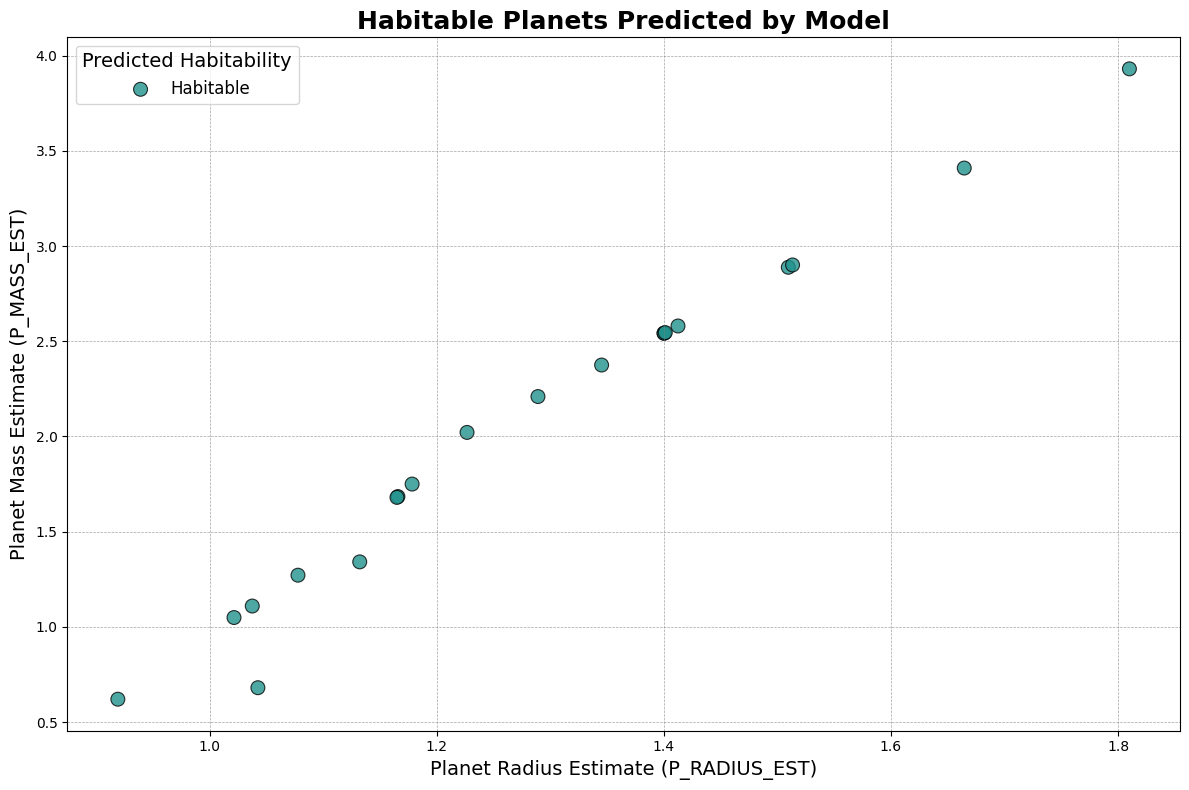

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only habitable planets
habitable_planets = new_filtered_data[new_filtered_data['Predicted_Habitable'] == 1]

# Create a scatter plot to visualize habitable planets
plt.figure(figsize=(12, 8))  # Slightly larger figure for better visibility
sns.scatterplot(
    data=habitable_planets,
    x='P_RADIUS_EST',
    y='P_MASS_EST',
    hue='Predicted_Habitable',
    palette='viridis',  # Colorblind-friendly palette
    alpha=0.8,  # Higher transparency for overlapping points
    edgecolor='k',  # Add black edges for better definition
    s=100  # Slightly larger point size for clarity
)

# Add title and labels with improved font size
plt.title('Habitable Planets Predicted by Model', fontsize=18, fontweight='bold')
plt.xlabel('Planet Radius Estimate (P_RADIUS_EST)', fontsize=14)
plt.ylabel('Planet Mass Estimate (P_MASS_EST)', fontsize=14)

# Adjust legend for clarity
plt.legend(
    title='Predicted Habitability',
    loc='upper left',  # Adjust position for better fit
    labels=['Habitable'],  # Show only 'Habitable' in the legend
    fontsize=12,
    title_fontsize=14
)

# Lighten gridlines for better aesthetics
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()


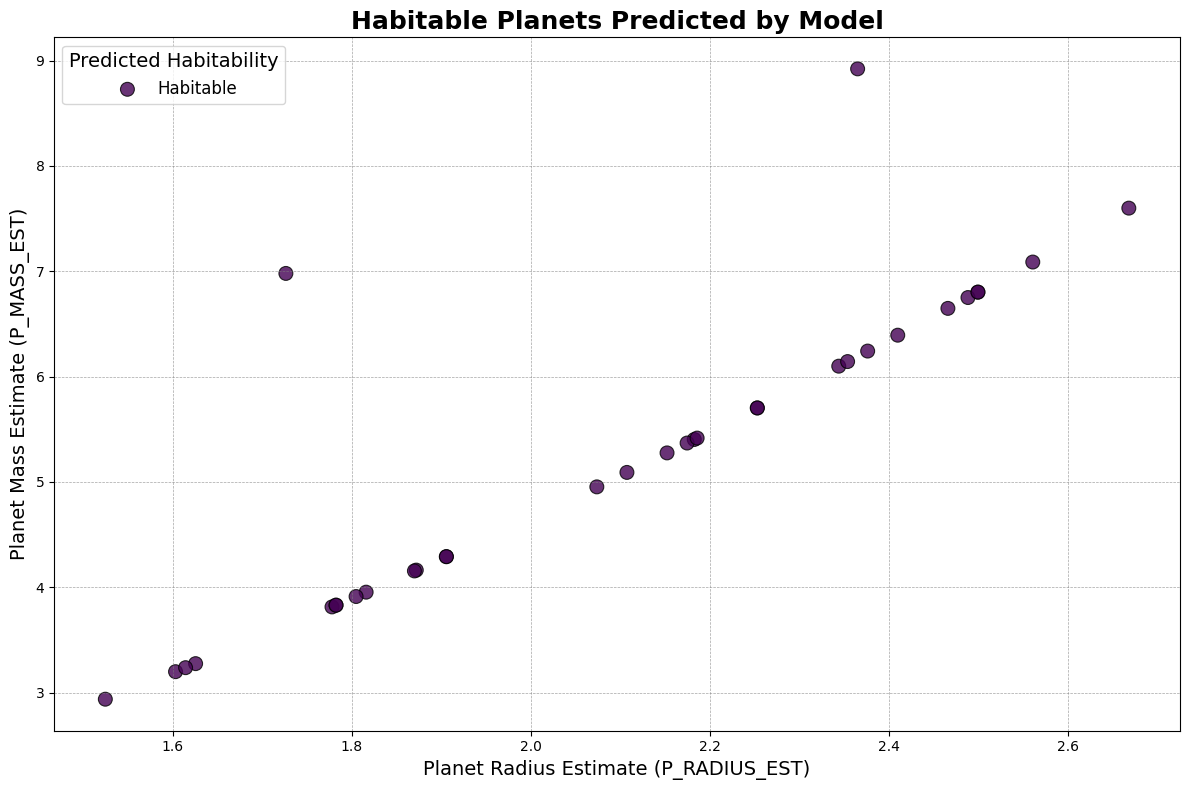

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only habitable planets
habitable_planets = new_filtered_data[new_filtered_data['Predicted_Habitable'] == 2]

# Create a scatter plot to visualize habitable planets
plt.figure(figsize=(12, 8))  # Slightly larger figure for better visibility
sns.scatterplot(
    data=habitable_planets,
    x='P_RADIUS_EST',
    y='P_MASS_EST',
    hue='Predicted_Habitable',
    palette='viridis',  # Colorblind-friendly palette
    alpha=0.8,  # Higher transparency for overlapping points
    edgecolor='k',  # Add black edges for better definition
    s=100  # Slightly larger point size for clarity
)

# Add title and labels with improved font size
plt.title('Habitable Planets Predicted by Model', fontsize=18, fontweight='bold')
plt.xlabel('Planet Radius Estimate (P_RADIUS_EST)', fontsize=14)
plt.ylabel('Planet Mass Estimate (P_MASS_EST)', fontsize=14)

# Adjust legend for clarity
plt.legend(
    title='Predicted Habitability',
    loc='upper left',  # Adjust position for better fit
    labels=['Habitable'],  # Show only 'Habitable' in the legend
    fontsize=12,
    title_fontsize=14
)

# Lighten gridlines for better aesthetics
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()


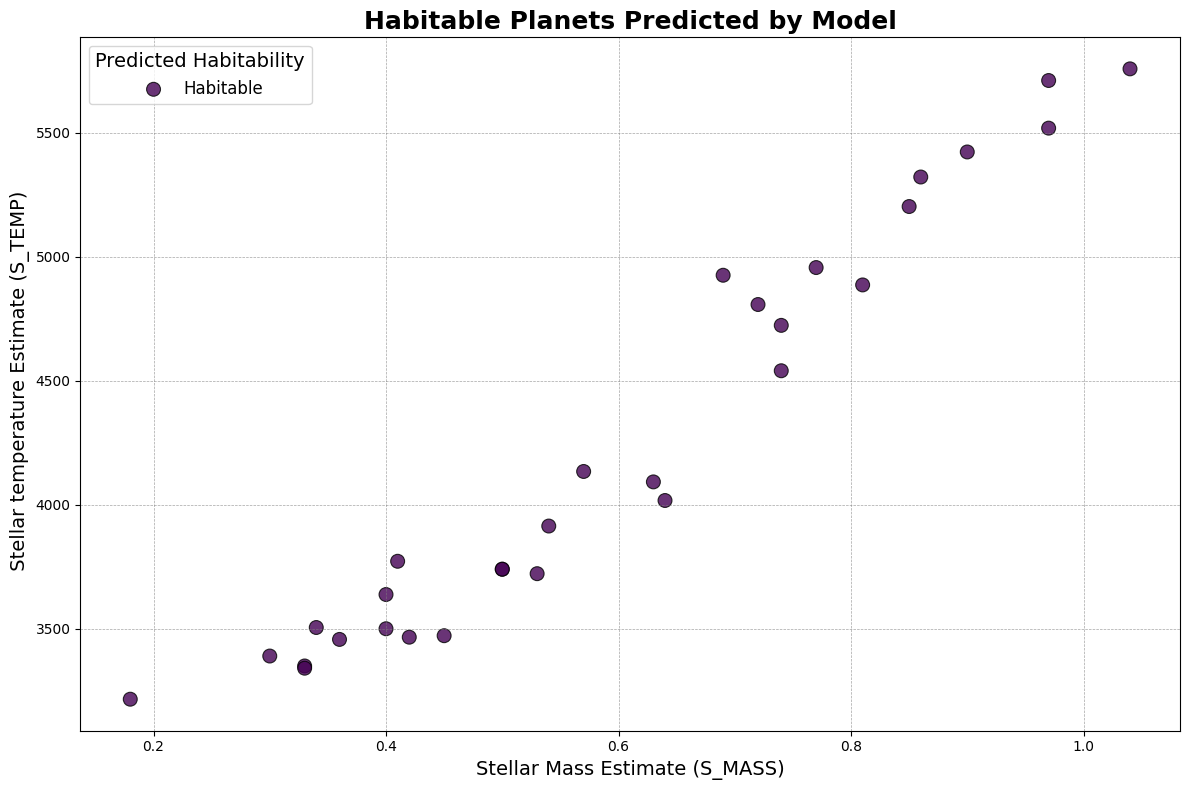

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Filter only habitable planets
habitable_planets = new_filtered_data[new_filtered_data['Predicted_Habitable'] == 2]

# Create a scatter plot to visualize habitable planets
plt.figure(figsize=(12, 8))  # Slightly larger figure for better visibility
sns.scatterplot(
    data=habitable_planets,
    x='S_MASS',
    y='S_TEMPERATURE',
    hue='Predicted_Habitable',
    palette='viridis',  # Colorblind-friendly palette
    alpha=0.8,  # Higher transparency for overlapping points
    edgecolor='k',  # Add black edges for better definition
    s=100  # Slightly larger point size for clarity
)

# Add title and labels with improved font size
plt.title('Habitable Planets Predicted by Model', fontsize=18, fontweight='bold')
plt.xlabel('Stellar Mass Estimate (S_MASS)', fontsize=14)
plt.ylabel(' Stellar temperature Estimate (S_TEMP)', fontsize=14)

# Adjust legend for clarity
plt.legend(
    title='Predicted Habitability',
    loc='upper left',  # Adjust position for better fit
    labels=['Habitable'],  # Show only 'Habitable' in the legend
    fontsize=12,
    title_fontsize=14
)

# Lighten gridlines for better aesthetics
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()


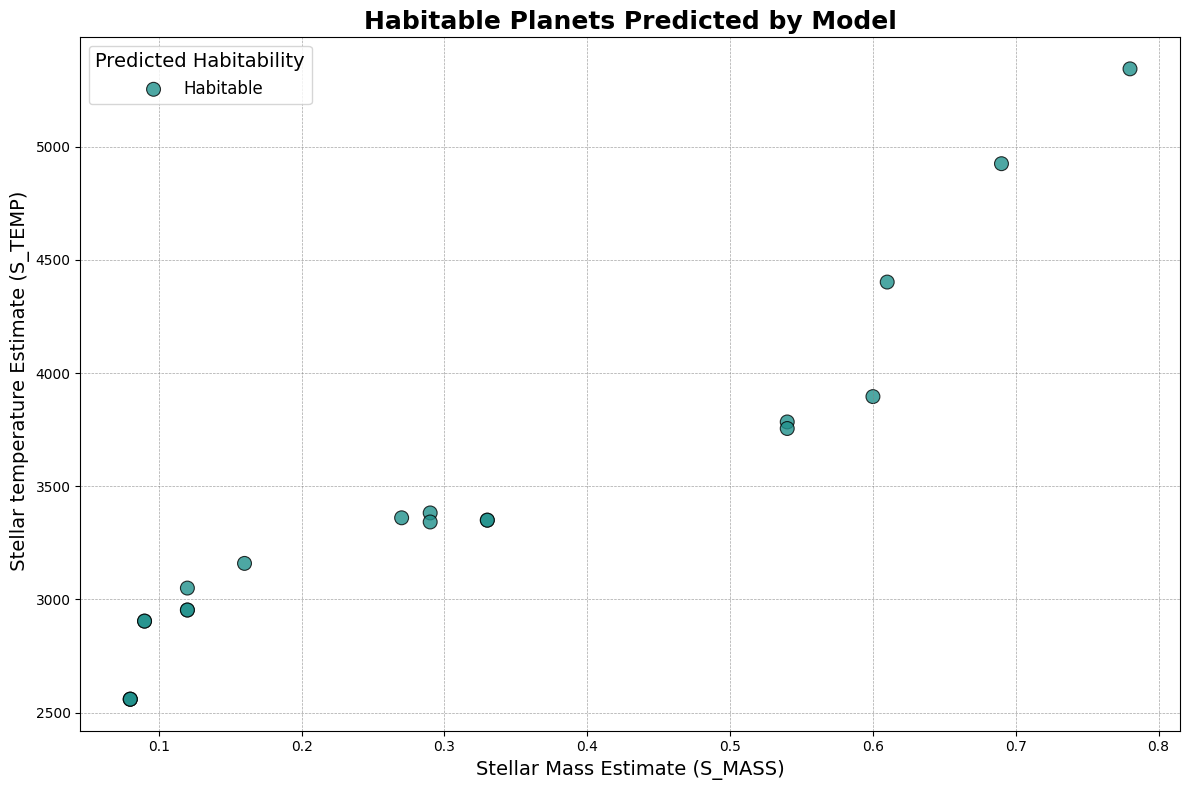

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Filter only habitable planets
habitable_planets = new_filtered_data[new_filtered_data['Predicted_Habitable'] == 1]

# Create a scatter plot to visualize habitable planets
plt.figure(figsize=(12, 8))  # Slightly larger figure for better visibility
sns.scatterplot(
    data=habitable_planets,
    x='S_MASS',
    y='S_TEMPERATURE',
    hue='Predicted_Habitable',
    palette='viridis',  # Colorblind-friendly palette
    alpha=0.8,  # Higher transparency for overlapping points
    edgecolor='k',  # Add black edges for better definition
    s=100  # Slightly larger point size for clarity
)

# Add title and labels with improved font size
plt.title('Habitable Planets Predicted by Model', fontsize=18, fontweight='bold')
plt.xlabel('Stellar Mass Estimate (S_MASS)', fontsize=14)
plt.ylabel(' Stellar temperature Estimate (S_TEMP)', fontsize=14)

# Adjust legend for clarity
plt.legend(
    title='Predicted Habitability',
    loc='upper left',  # Adjust position for better fit
    labels=['Habitable'],  # Show only 'Habitable' in the legend
    fontsize=12,
    title_fontsize=14
)

# Lighten gridlines for better aesthetics
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()


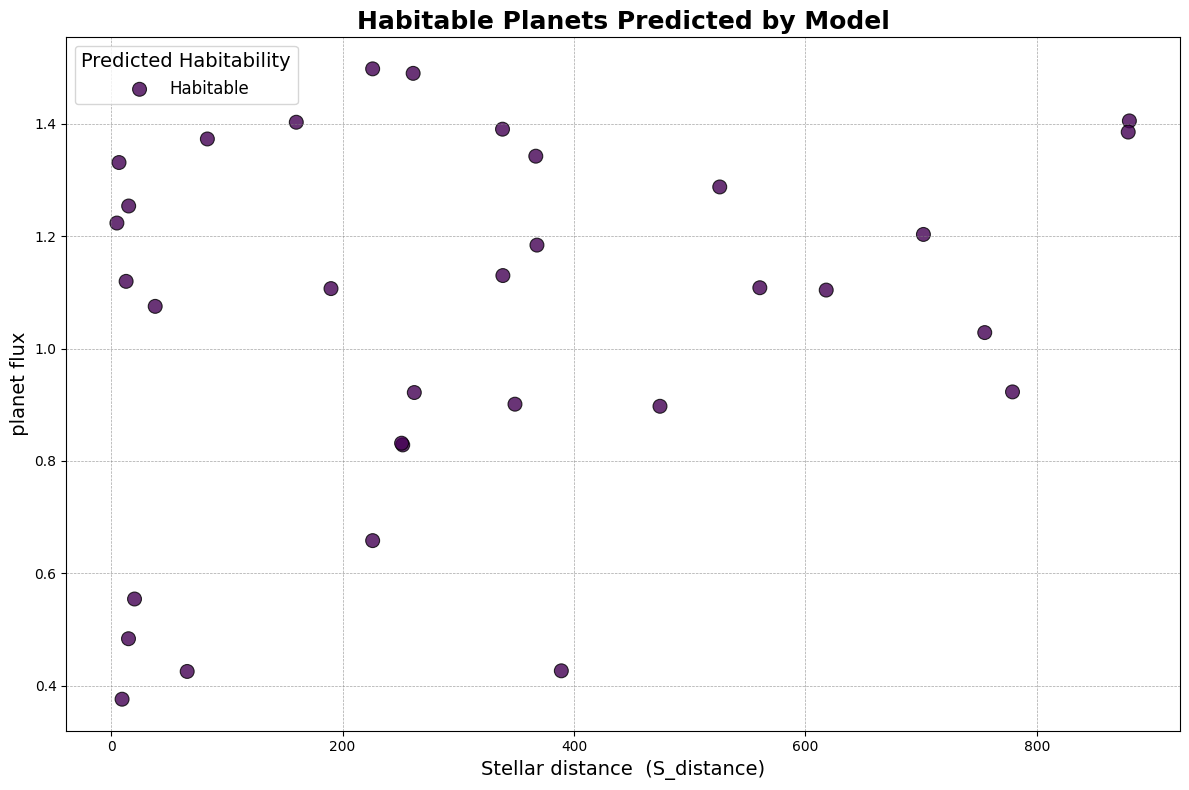

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Filter only habitable planets
habitable_planets = new_filtered_data[new_filtered_data['Predicted_Habitable'] == 2]

# Create a scatter plot to visualize habitable planets
plt.figure(figsize=(12, 8))  # Slightly larger figure for better visibility
sns.scatterplot(
    data=habitable_planets,
    x='S_DISTANCE',
    y='P_FLUX',
    hue='Predicted_Habitable',
    palette='viridis',  # Colorblind-friendly palette
    alpha=0.8,  # Higher transparency for overlapping points
    edgecolor='k',  # Add black edges for better definition
    s=100  # Slightly larger point size for clarity
)

# Add title and labels with improved font size
plt.title('Habitable Planets Predicted by Model', fontsize=18, fontweight='bold')
plt.xlabel('Stellar distance  (S_distance)', fontsize=14)
plt.ylabel(' planet flux ', fontsize=14)

# Adjust legend for clarity
plt.legend(
    title='Predicted Habitability',
    loc='upper left',  # Adjust position for better fit
    labels=['Habitable'],  # Show only 'Habitable' in the legend
    fontsize=12,
    title_fontsize=14
)

# Lighten gridlines for better aesthetics
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()


P_TYPE

<ipython-input-11-b6e7bf98ed3e>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-11-b6e7bf98ed3e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


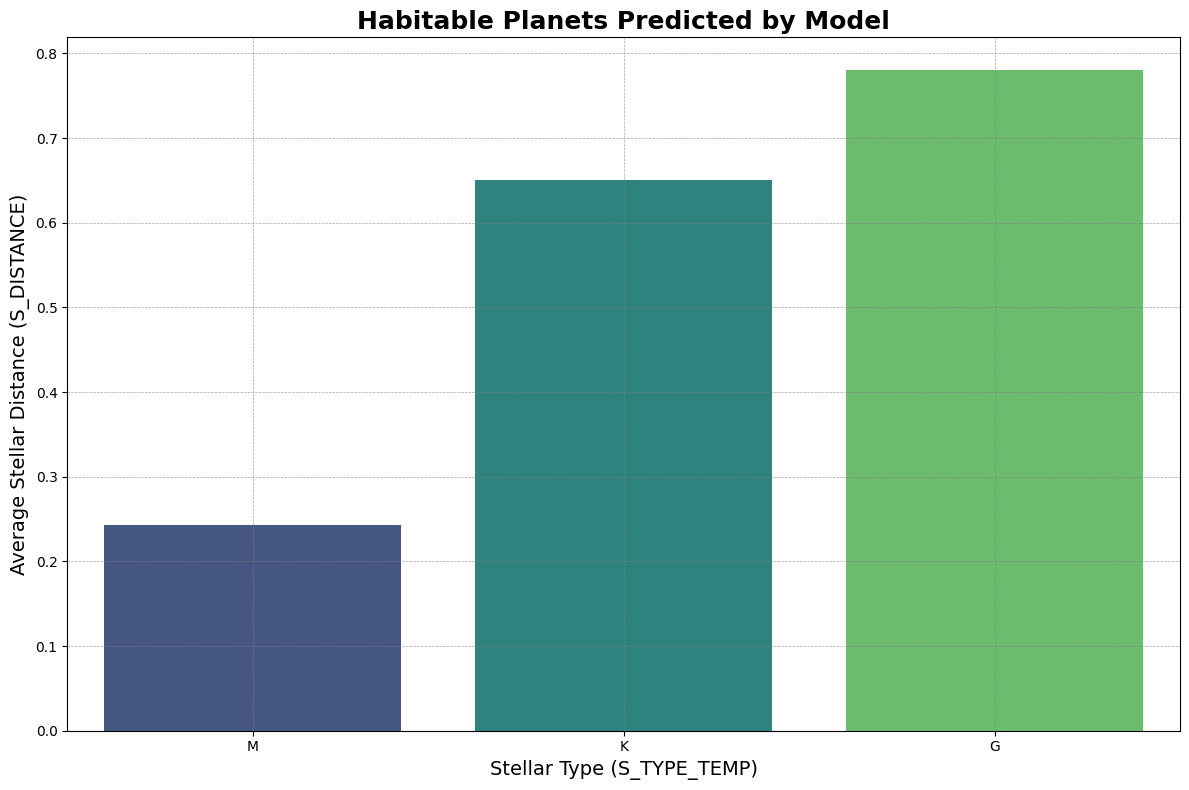

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only habitable planets
habitable_planets = new_filtered_data[new_filtered_data['Predicted_Habitable'] == 1]

# Create a bar plot to visualize habitable planets
plt.figure(figsize=(12, 8))  # Slightly larger figure for better visibility
sns.barplot(
    data=habitable_planets,
    x='S_TYPE_TEMP',
    y='S_MASS',
    palette='viridis',  # Colorblind-friendly palette
    ci=None  # Disable confidence intervals for simplicity
)

# Add title and labels with improved font size
plt.title('Habitable Planets Predicted by Model', fontsize=18, fontweight='bold')
plt.ylabel('Average Stellar Distance (S_DISTANCE)', fontsize=14)
plt.xlabel('Stellar Type (S_TYPE_TEMP)', fontsize=14)

# Lighten gridlines for better aesthetics
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()


<ipython-input-12-8acb7be3cbf7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-12-8acb7be3cbf7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


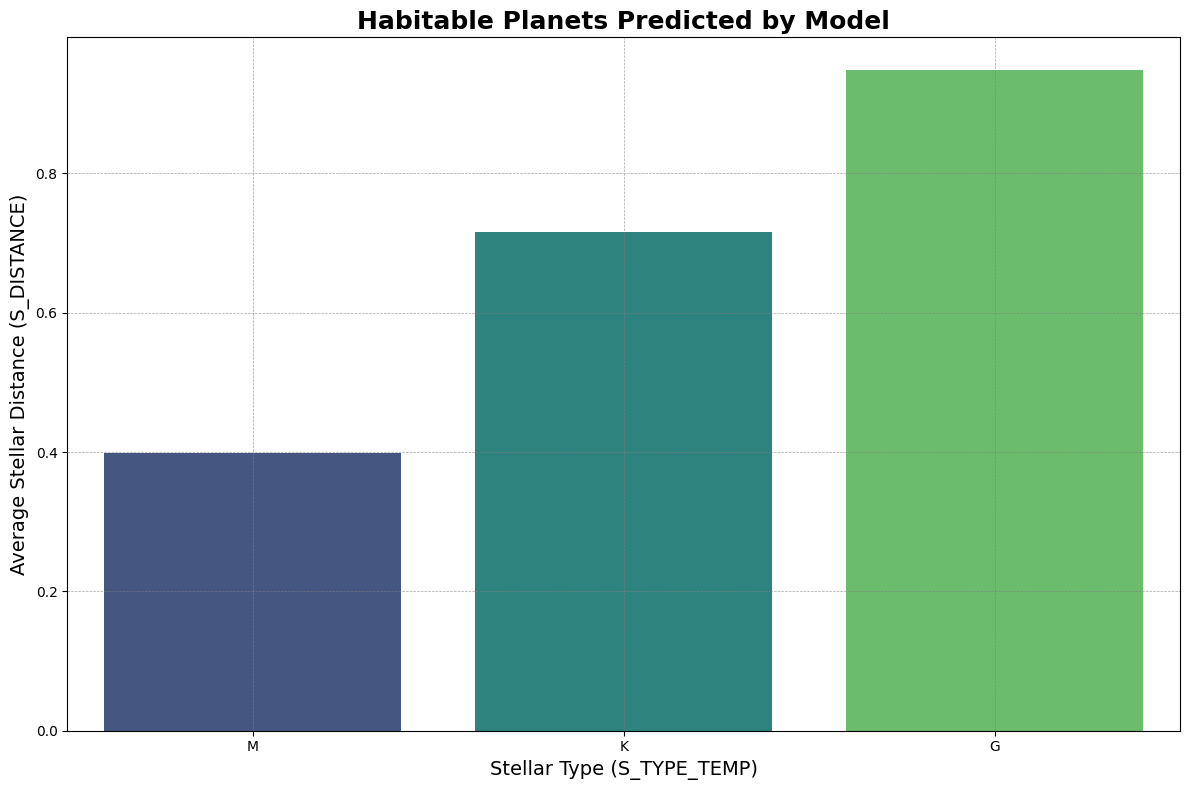

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only habitable planets
habitable_planets = new_filtered_data[new_filtered_data['Predicted_Habitable'] == 2]

# Create a bar plot to visualize habitable planets
plt.figure(figsize=(12, 8))  # Slightly larger figure for better visibility
sns.barplot(
    data=habitable_planets,
    x='S_TYPE_TEMP',
    y='S_MASS',
    palette='viridis',  # Colorblind-friendly palette
    ci=None  # Disable confidence intervals for simplicity
)

# Add title and labels with improved font size
plt.title('Habitable Planets Predicted by Model', fontsize=18, fontweight='bold')
plt.ylabel('Average Stellar Distance (S_DISTANCE)', fontsize=14)
plt.xlabel('Stellar Type (S_TYPE_TEMP)', fontsize=14)

# Lighten gridlines for better aesthetics
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()


<ipython-input-13-5344eb3a1fbd>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-13-5344eb3a1fbd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


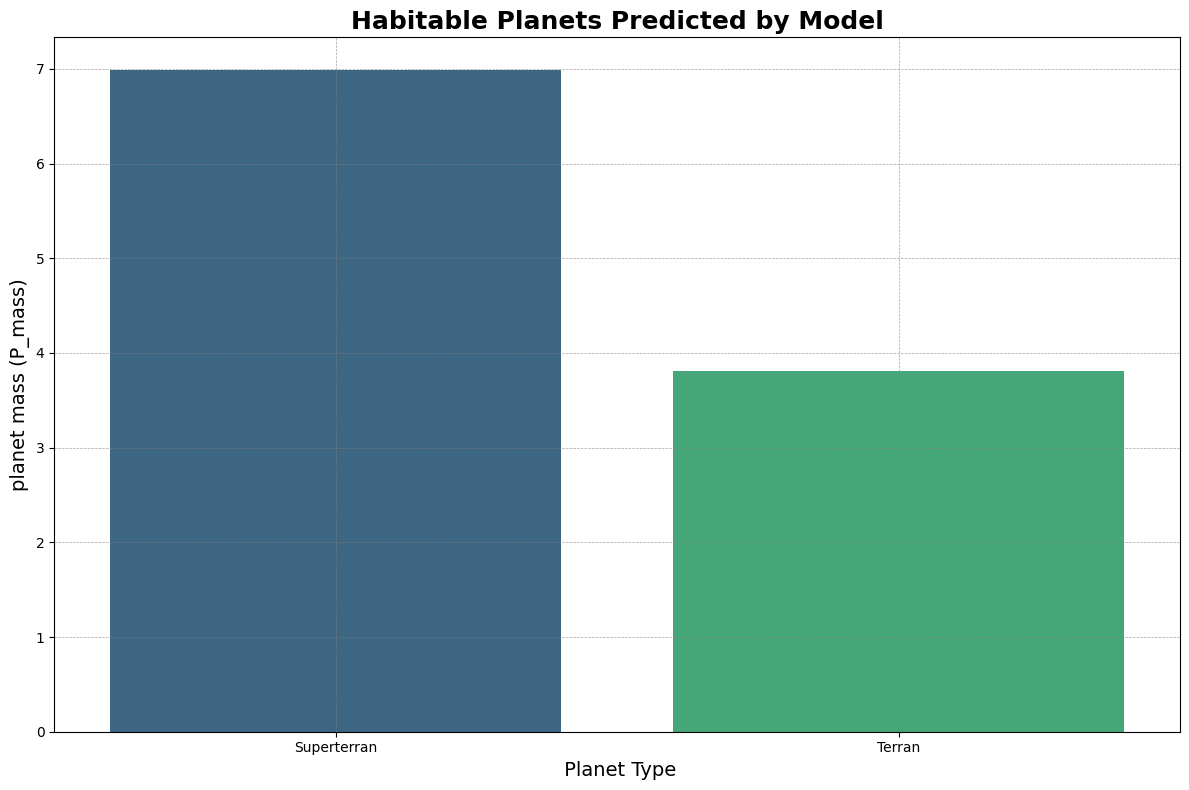

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only habitable planets
habitable_planets = new_filtered_data[new_filtered_data['Predicted_Habitable'] == 2]

# Create a bar plot to visualize habitable planets
plt.figure(figsize=(12, 8))  # Slightly larger figure for better visibility
sns.barplot(
    data=habitable_planets,
    x='P_TYPE',
    y='P_MASS',
    palette='viridis',  # Colorblind-friendly palette
    ci=None  # Disable confidence intervals for simplicity
)

# Add title and labels with improved font size
plt.title('Habitable Planets Predicted by Model', fontsize=18, fontweight='bold')
plt.ylabel('planet mass (P_mass)', fontsize=14)
plt.xlabel(' Planet Type', fontsize=14)

# Lighten gridlines for better aesthetics
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()


# Step 1: Visual Data Preprocessing

       P_STATUS     P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX   P_RADIUS  \
count      53.0  22.000000         22.000000         22.000000  36.000000   
mean        3.0   3.615611         -0.726399          0.815377   1.839317   
std         0.0   2.589500          0.662829          0.643136   0.445692   
min         3.0   0.619765         -2.606190          0.130309   0.919220   
25%         3.0   1.425926         -1.036914          0.252655   1.521757   
50%         3.0   2.715840         -0.759609          0.854957   1.843010   
75%         3.0   5.925109         -0.198642          1.036914   2.202765   
max         3.0   8.921432          0.240000          2.606190   2.499830   

       P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX       P_YEAR    P_PERIOD  \
count           36.000000           36.000000    53.000000   53.000000   
mean            -0.156896            0.168101  2015.528302   88.661768   
std              0.186480            0.101812     2.005797   88.380288   
min       

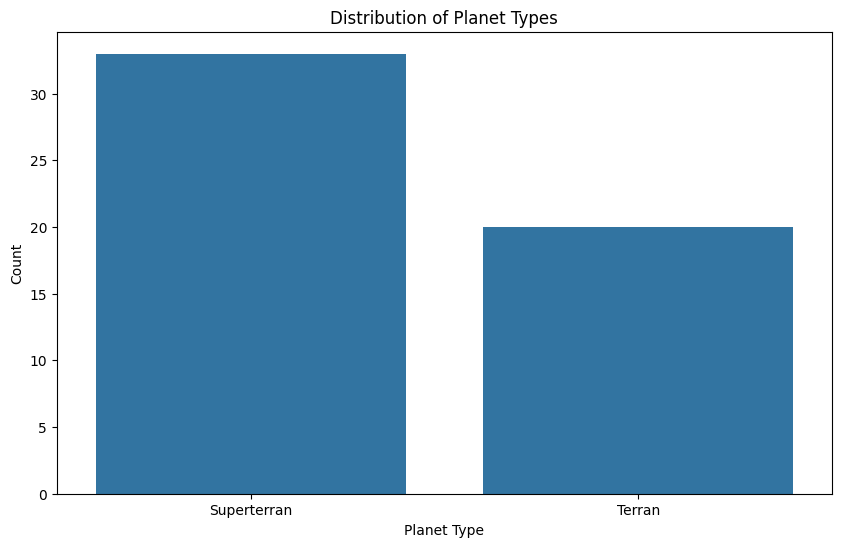

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv('phl_exoplanet_catalog_2019.csv' )

# Filter based on the criteria
filtered_data = dataset[
    (dataset['P_TYPE_TEMP'] == 'Warm') &
    (dataset['P_TYPE'].isin(['Terran', 'Superterran'])) &
    (dataset['S_TYPE_TEMP'].isin(['G', 'K', 'M']))
]

# Display basic statistics and check for missing values
print(filtered_data.describe())
print(filtered_data.isnull().sum())

# Visualize the distribution of planet types
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='P_TYPE')
plt.title('Distribution of Planet Types')
plt.xlabel('Planet Type')
plt.ylabel('Count')
plt.show()

# Feature engineeing

In [ ]:
# Example: Convert categorical columns to numerical codes
filtered_data['P_TYPE_CODE'] = filtered_data['P_TYPE'].astype('category').cat.codes
filtered_data['S_TYPE_TEMP_CODE'] = filtered_data['S_TYPE_TEMP'].astype('category').cat.codes

# Display the new features
print(filtered_data[['P_NAME', 'P_TYPE', 'P_TYPE_CODE', 'S_TYPE_TEMP', 'S_TYPE_TEMP_CODE']].head())

        P_NAME       P_TYPE  P_TYPE_CODE S_TYPE_TEMP  S_TYPE_TEMP_CODE
137   GJ 163 c  Superterran            0           M                 2
140   GJ 273 b       Terran            1           M                 2
151  GJ 3293 d  Superterran            0           M                 2
153  GJ 3323 b       Terran            1           M                 2
159   GJ 357 d  Superterran            0           M                 2


<ipython-input-15-acdc0ac3dab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['P_TYPE_CODE'] = filtered_data['P_TYPE'].astype('category').cat.codes
<ipython-input-15-acdc0ac3dab5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['S_TYPE_TEMP_CODE'] = filtered_data['S_TYPE_TEMP'].astype('category').cat.codes


# Step 3: Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = filtered_data[['P_TYPE_CODE', 'S_TYPE_TEMP_CODE']]  # Add more features as needed
y = filtered_data['P_TYPE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

 Superterran       1.00      1.00      1.00         8
      Terran       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



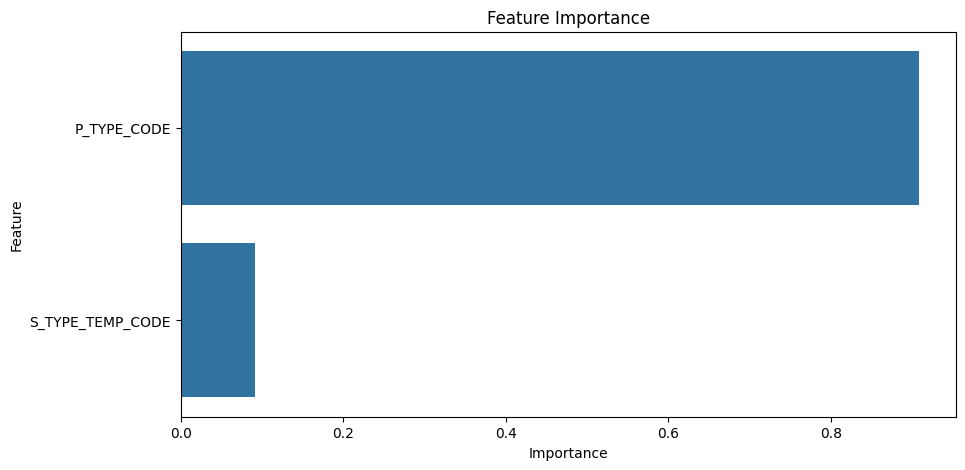

In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

<ipython-input-19-2c497d3c8751>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Predicted Planet Type')


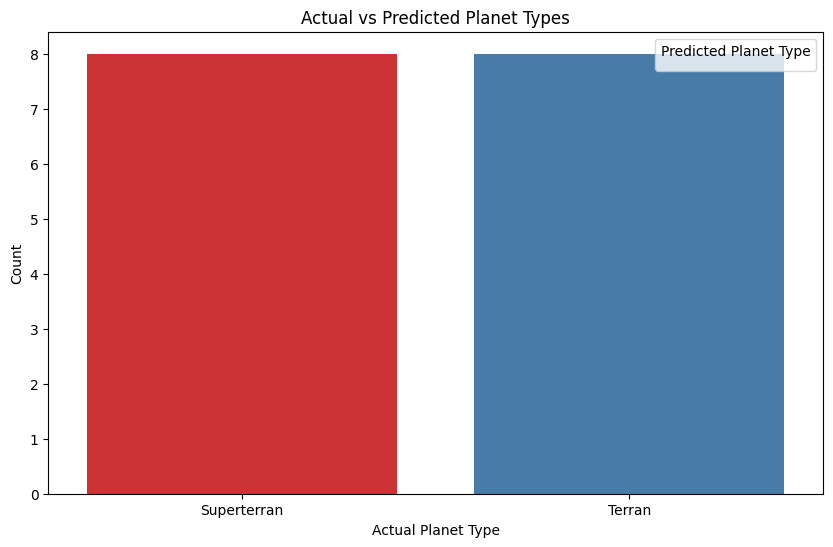

In [ ]:
# Visualize Actual vs Predicted
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
sns.countplot(data=results_df, x='Actual', hue='Predicted', palette='Set1')
plt.title('Actual vs Predicted Planet Types')
plt.xlabel('Actual Planet Type')
plt.ylabel('Count')
plt.legend(title='Predicted Planet Type')
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/PHL-EC.csv')


In [ ]:
data

P. Name P. Name Kepler  P. Name KOI P. Zone Class  \
0          1RXS 1609 b            NaN          NaN          Cold   
1       1SWASP J1407 b            NaN          NaN          Cold   
2     2M 0103-55(AB) b            NaN          NaN          Cold   
3         2M 0122-24 b            NaN          NaN          Cold   
4         2M 0219-39 b            NaN          NaN          Cold   
...                ...            ...          ...           ...   
3870         YBP1194 b            NaN          NaN           Hot   
3871         YBP1514 b            NaN          NaN           Hot   
3872          YZ Cet b            NaN          NaN           Hot   
3873          YZ Cet c            NaN          NaN           Hot   
3874          YZ Cet d            NaN          NaN           Hot   

     P. Mass Class P. Composition Class P. Atmosphere Class  \
0           Jovian                  gas       hydrogen-rich   
1           Jovian                  gas       hydrogen-rich   
2           Jovian                  gas       hydrogen-rich   
3           Jovian                  gas       hydrogen-rich   
4           Jovian                  gas       hydrogen-rich   
...            ...                  ...                 ...   
3870        Jovian                  gas         metals-rich   
3871        Jovian                  gas         metals-rich   
3872        Terran           rocky-iron         metals-rich   
3873        Terran           rocky-iron         metals-rich   
3874        Terran           rocky-iron         metals-rich   

     P. Habitable Class  P. Min Mass (EU)  P. Mass (EU)  ...  P. Int ESI  \
0         non-habitable               NaN       4451.16  ...           0   
1         non-habitable           6358.80       6358.80  ...           0   
2         non-habitable           4133.22       4133.22  ...           0   
3         non-habitable               NaN       6358.80  ...           0   
4         non-habitable               NaN       4419.37  ...           0   
...                 ...               ...           ...  ...         ...   
3870      non-habitable            108.10        108.10  ...           0   
3871      non-habitable            127.18        127.18  ...           0   
3872      non-habitable              0.76          0.76  ...           0   
3873      non-habitable              0.99          0.99  ...           0   
3874      non-habitable              1.14          1.14  ...           0   

      P. Surf ESI  P. ESI  S. HabCat  P. Habitable P. Hab Moon P. Confirmed  \
0               0    0.05          0             0           0            1   
1               0    0.07          0             0           0            1   
2               0    0.06          0             0           0            1   
3               0    0.08          0             0           0            1   
4               0    0.06          0             0           0            1   
...           ...     ...        ...           ...         ...          ...   
3870            0    0.16          0             0           0            1   
3871            0    0.15          0             0           0            1   
3872            0    0.43          0             0           0            1   
3873            0    0.53          0             0           0            1   
3874            0    0.65          0             0           0            1   

      P. Disc. Method  P. Disc. Year  Unnamed: 68  
0             Imaging           2008          NaN  
1     Primary Transit           2012          NaN  
2             Imaging           2013          NaN  
3             Imaging           2013          NaN  
4             Imaging           2015          NaN  
...               ...            ...          ...  
3870  Radial Velocity           2014          NaN  
3871  Radial Velocity           2014          NaN  
3872  Radial Velocity           2017          NaN  
3873  Radial Velocity           2017          NaN  
3874  R

# Visulzation

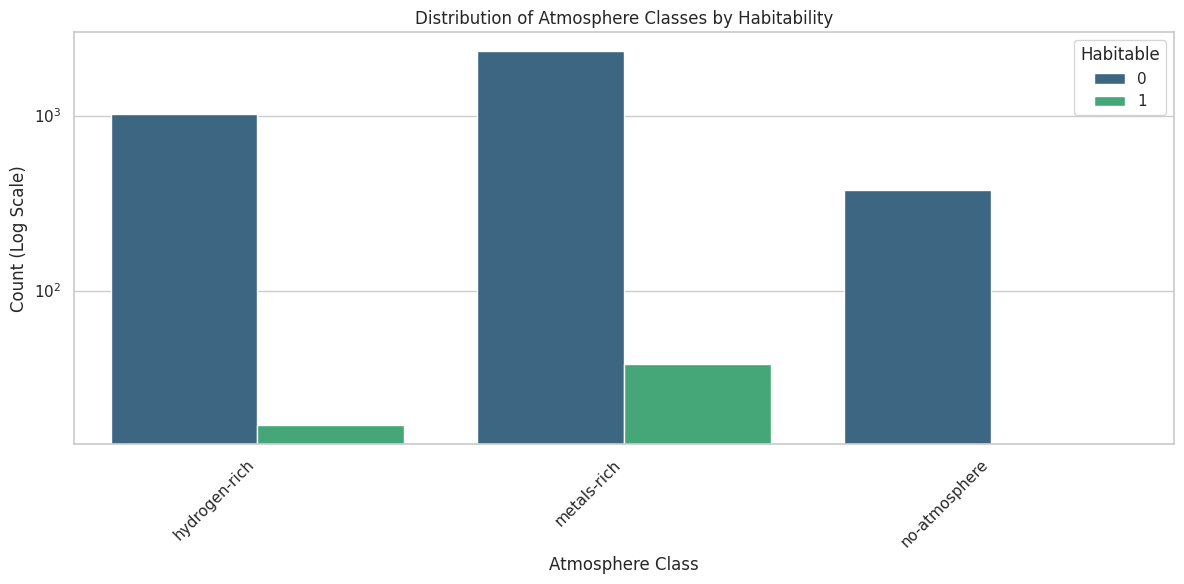

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Bar plot for planet atmosphere class and habitability with log scale on y-axis
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="P. Atmosphere Class", hue="P. Habitable", palette="viridis")
plt.title("Distribution of Atmosphere Classes by Habitability")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Atmosphere Class")
plt.ylabel("Count (Log Scale)")
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.legend(title="Habitable")
plt.tight_layout()
plt.show()




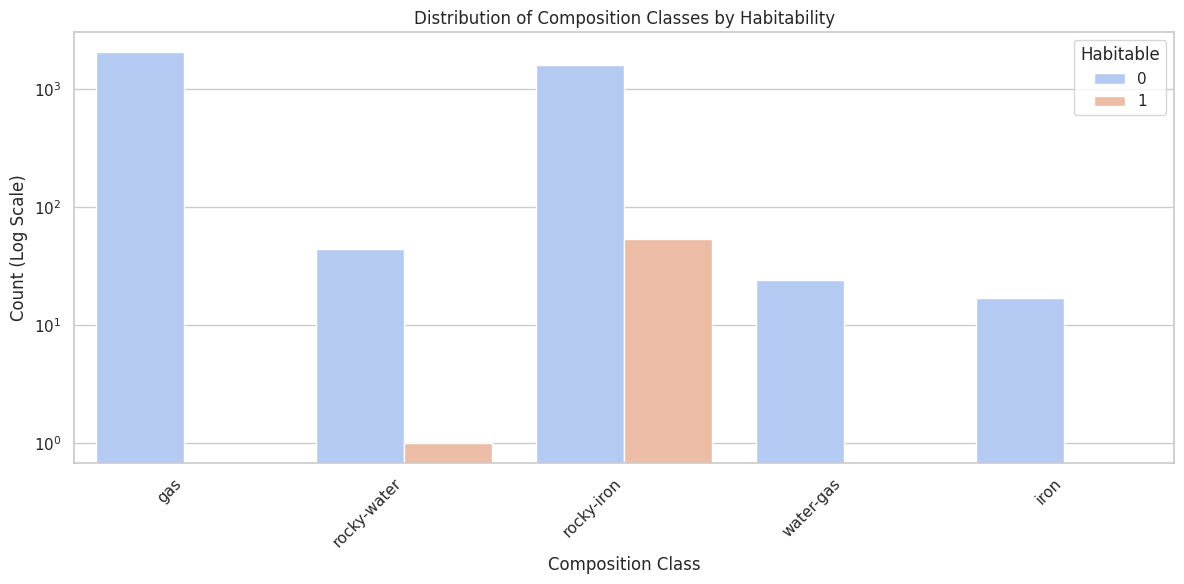

In [ ]:

# Bar plot for composition class by habitability
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="P. Composition Class", hue="P. Habitable", palette="coolwarm")
plt.title("Distribution of Composition Classes by Habitability")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Composition Class")
plt.ylabel("Count (Log Scale)")
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.legend(title="Habitable")
plt.tight_layout()
plt.show()



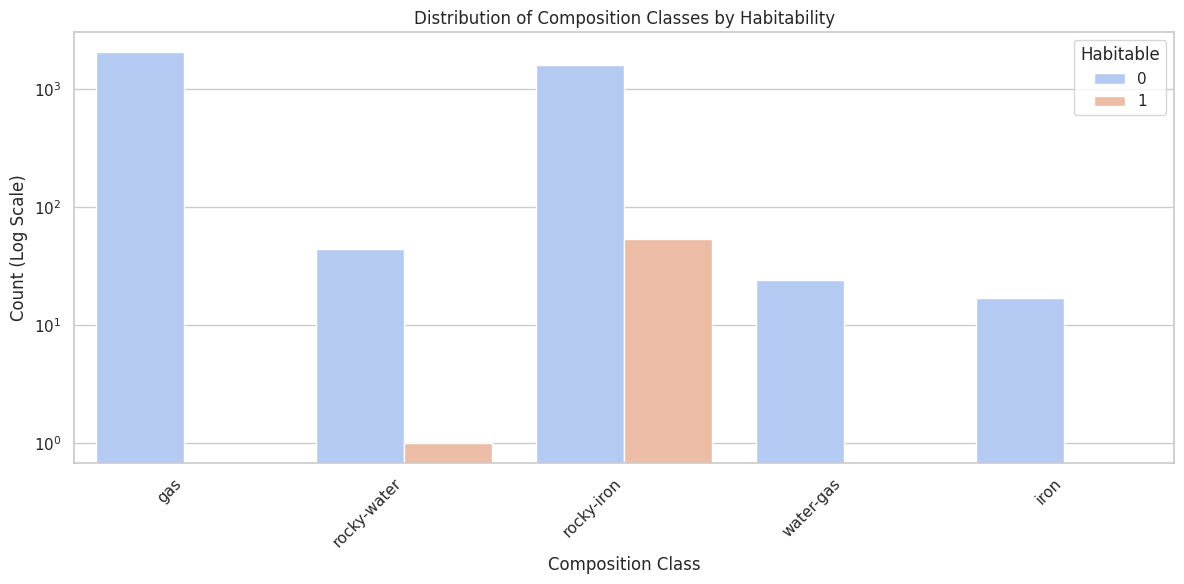

In [ ]:
# Bar plot for composition class by habitability
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="P. Composition Class", hue="P. Habitable", palette="coolwarm")
plt.title("Distribution of Composition Classes by Habitability")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Composition Class")
plt.ylabel("Count (Log Scale)")
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.legend(title="Habitable")
plt.tight_layout()
plt.show()



<ipython-input-25-5284e1a97280>:2: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


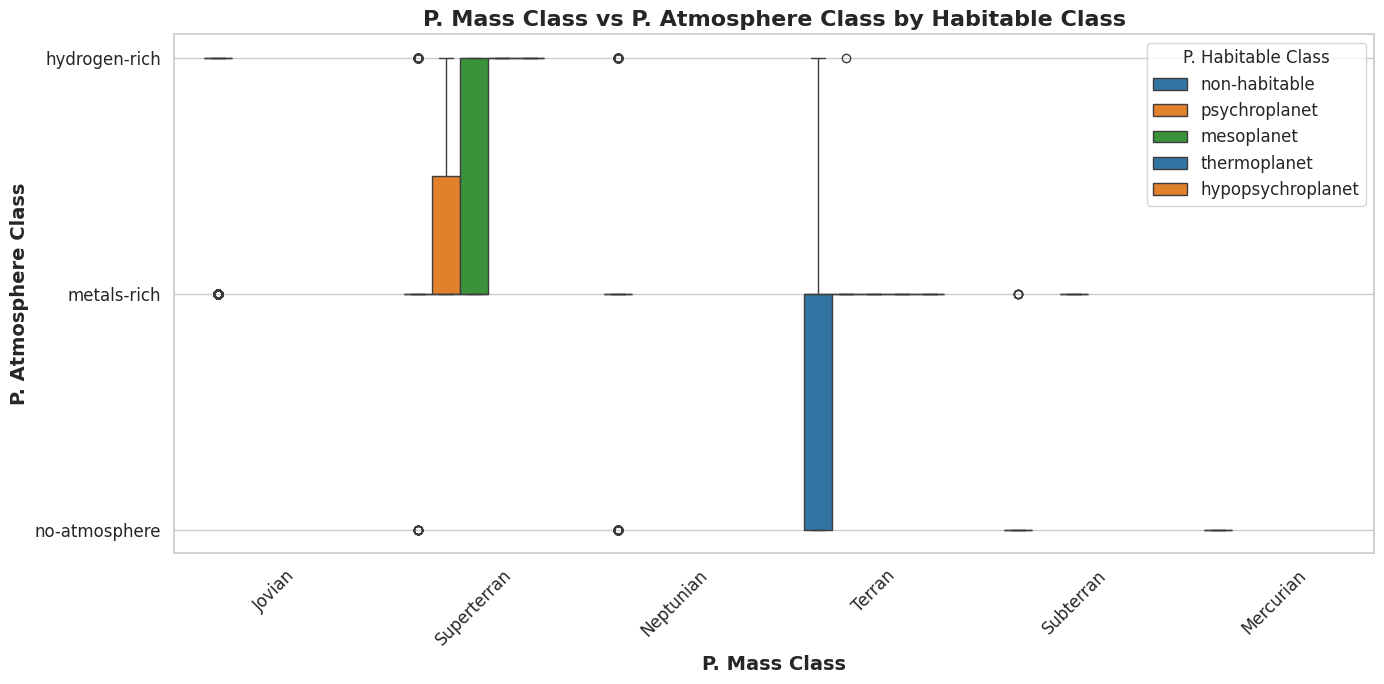

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(
    x='P. Mass Class',
    y='P. Atmosphere Class',
    data=data,
    hue='P. Habitable Class',
    palette=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    width=0.7
)
plt.title("P. Mass Class vs P. Atmosphere Class by Habitable Class", fontsize=16, weight='bold')
plt.xlabel("P. Mass Class", fontsize=14, weight='bold')
plt.ylabel("P. Atmosphere Class", fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title="P. Habitable Class", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-26-989cc83714d7>:2: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


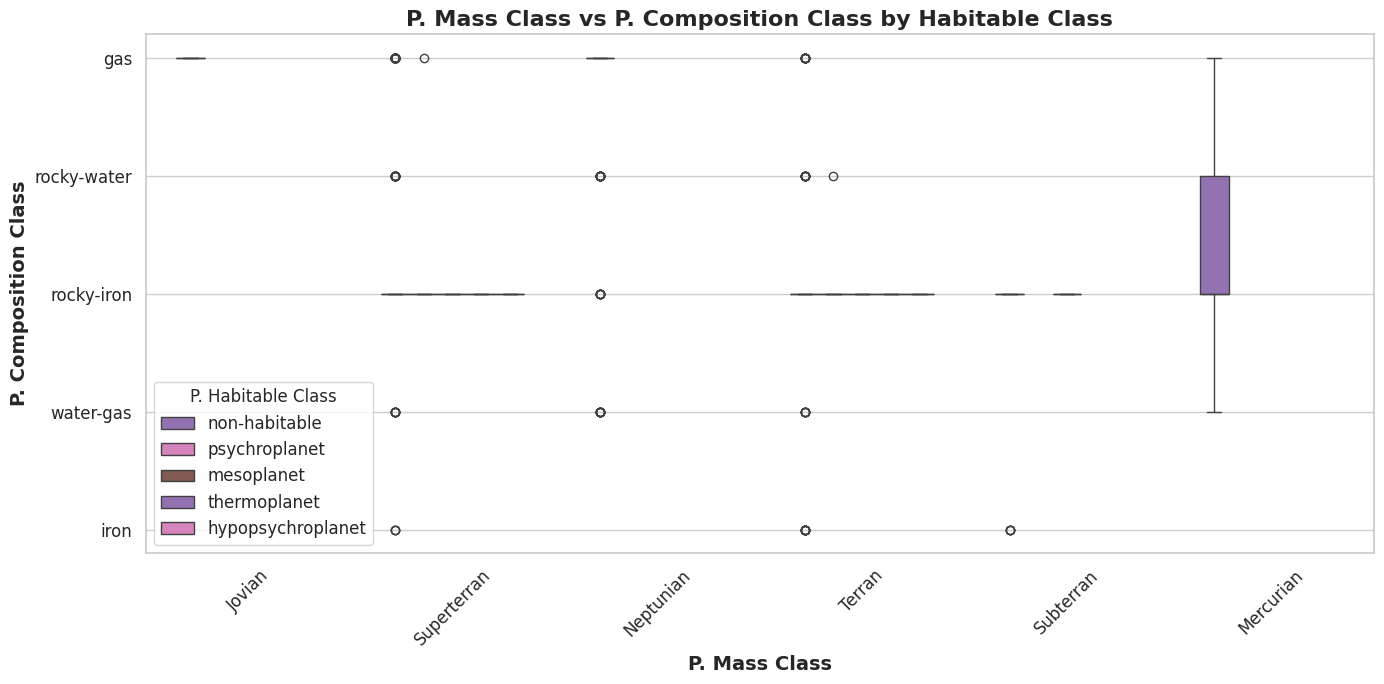

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(
    x='P. Mass Class',
    y='P. Composition Class',
    data=data,
    hue='P. Habitable Class',
    palette=['#9467bd', '#e377c2', '#8c564b'],  # Purple, Pink, Brown
    width=0.7
)
plt.title("P. Mass Class vs P. Composition Class by Habitable Class", fontsize=16, weight='bold')
plt.xlabel("P. Mass Class", fontsize=14, weight='bold')
plt.ylabel("P. Composition Class", fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title="P. Habitable Class", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-27-9f6ae1a9382c>:2: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


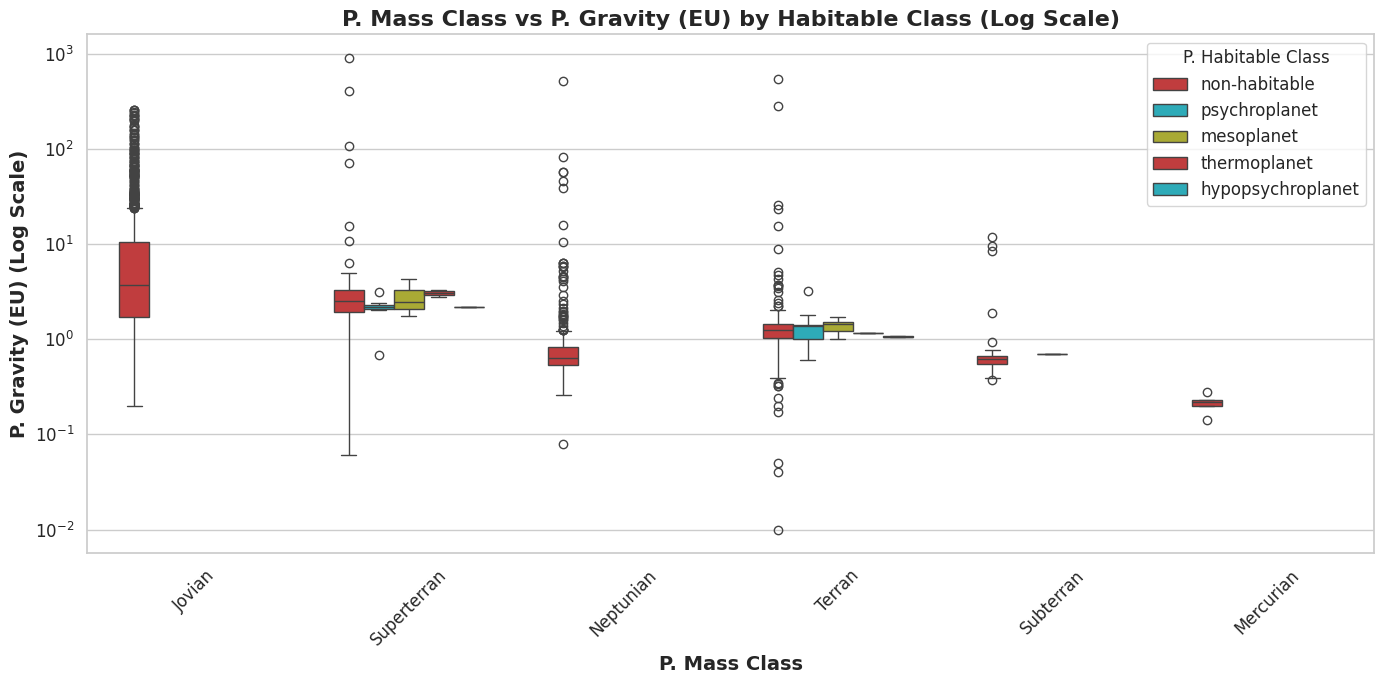

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(
    x='P. Mass Class',
    y='P. Gravity (EU)',
    data=data,
    hue='P. Habitable Class',
    palette=['#d62728', '#17becf', '#bcbd22'],  # Red, Cyan, Yellow
    width=0.7
)

# Set the y-axis to a logarithmic scale
plt.yscale("log")

# Add title and labels
plt.title("P. Mass Class vs P. Gravity (EU) by Habitable Class (Log Scale)", fontsize=16, weight='bold')
plt.xlabel("P. Mass Class", fontsize=14, weight='bold')
plt.ylabel("P. Gravity (EU) (Log Scale)", fontsize=14, weight='bold')

# Customize tick marks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
plt.legend(title="P. Habitable Class", fontsize=12)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


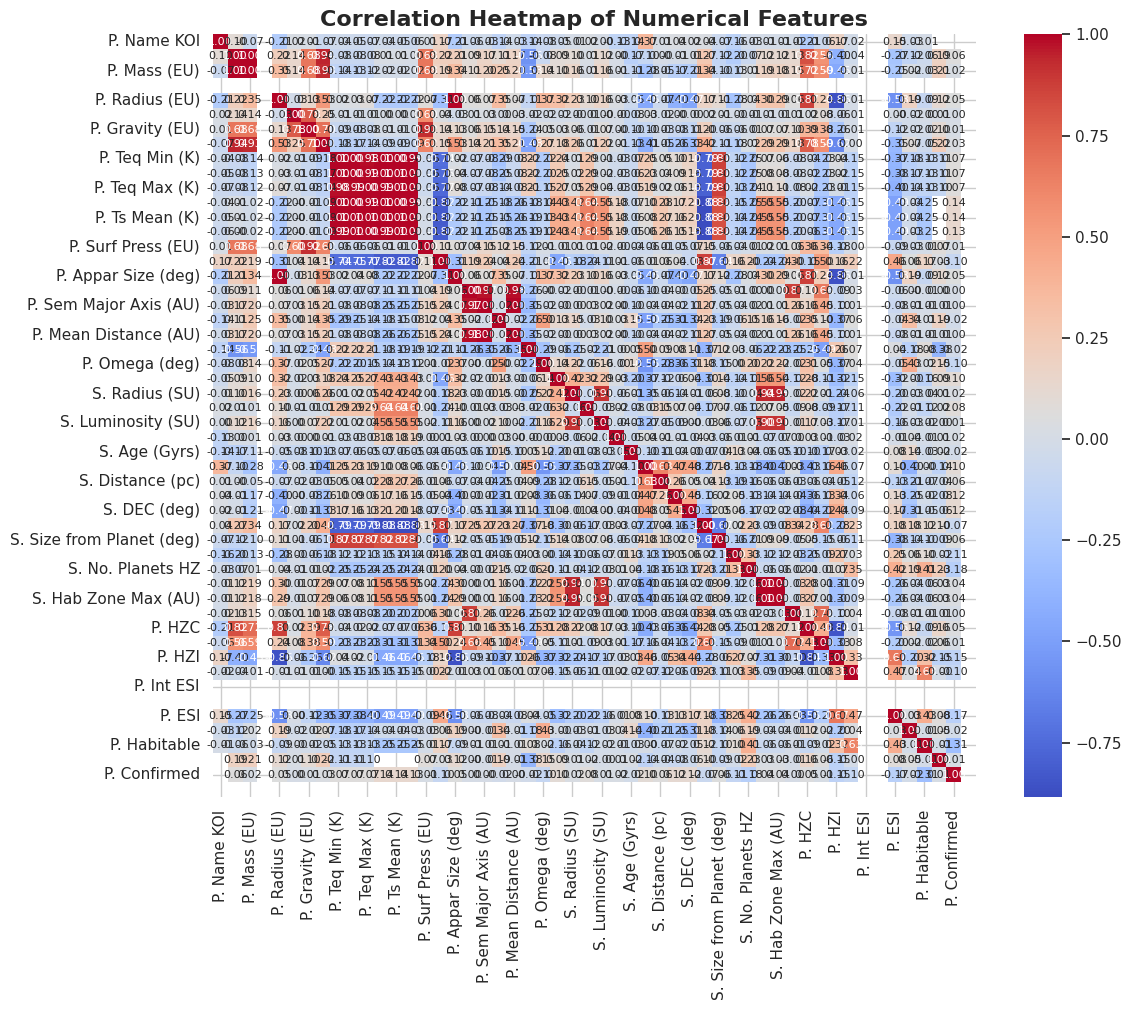

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
data = pd.read_csv('/content/PHL-EC.csv')

# Ensure column names are stripped of whitespace
data.columns = data.columns.str.strip()

# ======================
# 1. Correlation Heatmap
# ======================
# Select numeric columns for correlation analysis
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, annot_kws={"size": 8})
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


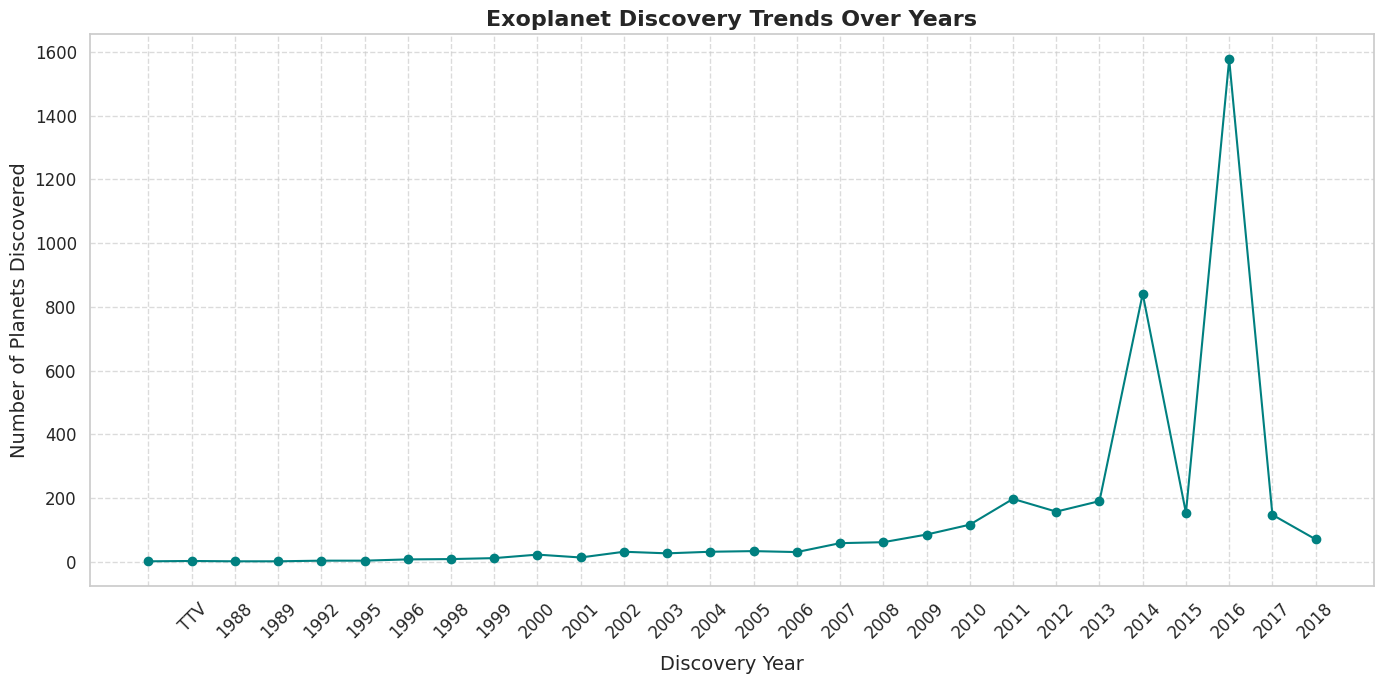

In [ ]:
# ==============================
# 3. Discovery Year Trend
# ==============================
# Count the number of planets discovered per year
discovery_trend = data['P. Disc. Year'].value_counts().sort_index()

# Plot discovery trends
plt.figure(figsize=(14, 7))
plt.plot(discovery_trend.index, discovery_trend.values, marker='o', linestyle='-', color='teal')
plt.title("Exoplanet Discovery Trends Over Years", fontsize=16, weight='bold')
plt.xlabel("Discovery Year", fontsize=14)
plt.ylabel("Number of Planets Discovered", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


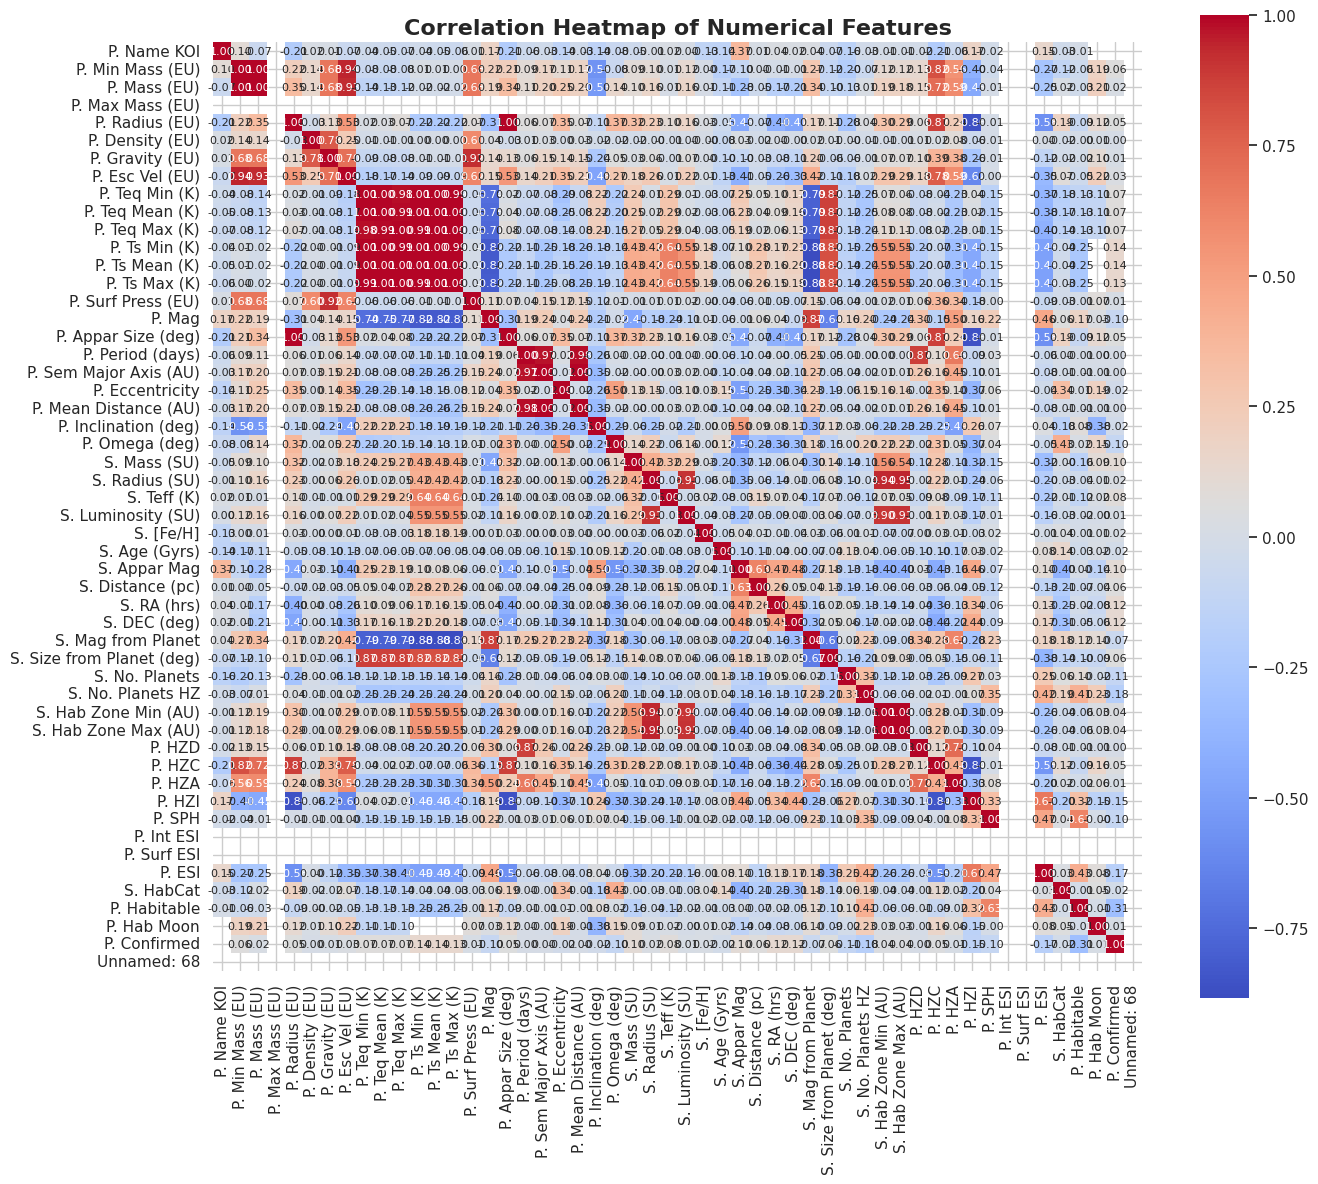

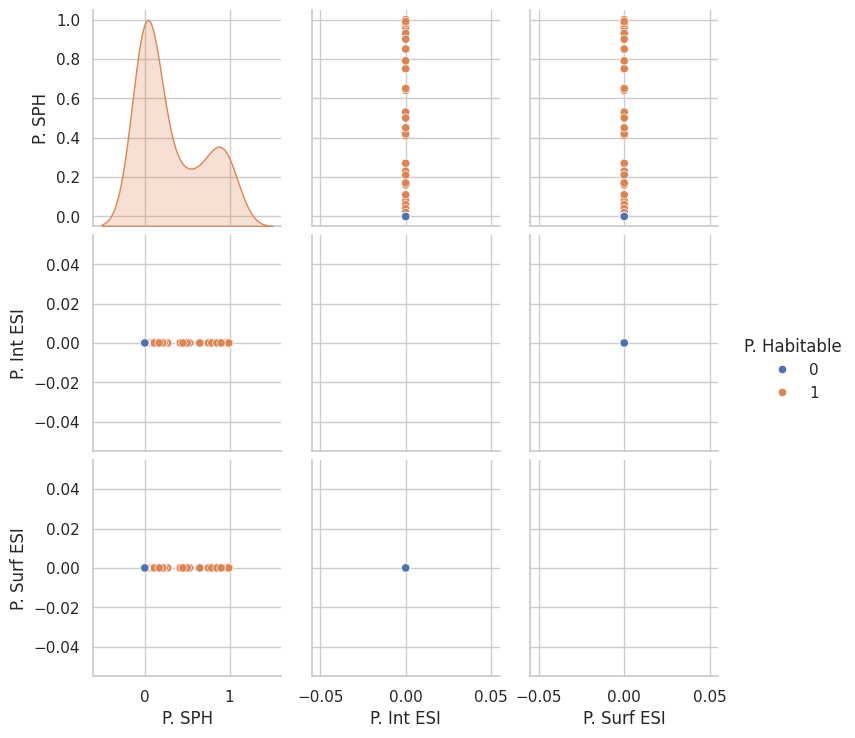

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
data = pd.read_csv('/content/PHL-EC.csv')

# Ensure column names are stripped of whitespace
data.columns = data.columns.str.strip()

# ======================
# 1. Correlation Heatmap
# ======================
# Select numeric columns for correlation analysis
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, annot_kws={"size": 8})
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# ======================
# 2. Pairplot of Features
# ======================
# Select features for pairplot
pairplot_features = ['P. SPH', 'P. Int ESI', 'P. Surf ESI', 'P. Habitable']  # Adjust based on dataset
sns.pairplot(data[pairplot_features], hue='P. Habitable', diag_kind='kde')
plt.show()


# Clustering

In [ ]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs
from sklearn.preprocessing import StandardScaler


# Load the dataset
data = pd.read_csv('/content/PHL-EC.csv')

# Ensure column names are stripped of whitespace
data.columns = data.columns.str.strip()

# Select features for clustering
features = ['P. ESI', 'P. SPH', 'S. Distance (pc)', 'S. Appar Mag']  # Adjust based on your dataset
data_cluster = data[features]

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column
data_cluster = imputer.fit_transform(data_cluster)

# Normalize the data (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)  # Use the imputed data here

# ======================
# KMeans Clustering
# ======================
kmeans = KMeans(n_clusters=3, random_state=42)  # Set number of clusters to 3 (can be adjusted

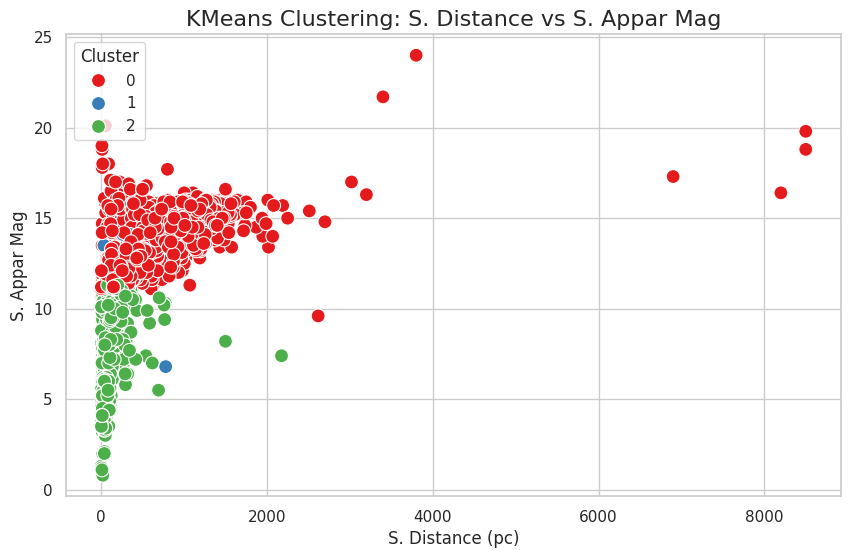

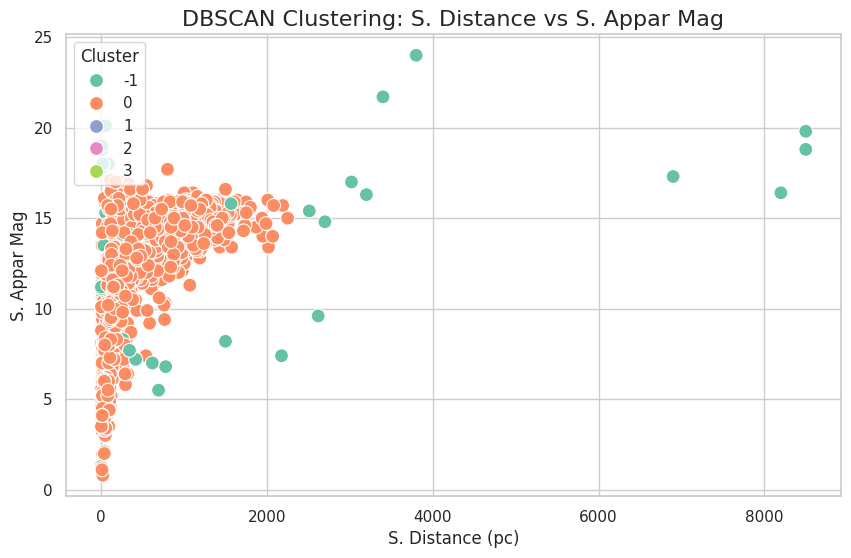

In [ ]:
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# Plot KMeans Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['S. Distance (pc)'], y=data['S. Appar Mag'], hue=data['KMeans_Cluster'], palette='Set1', s=100)
plt.title('KMeans Clustering: S. Distance vs S. Appar Mag', fontsize=16)
plt.xlabel('S. Distance (pc)')
plt.ylabel('S. Appar Mag')
plt.legend(title='Cluster', loc='upper left')
plt.show()

# ======================
# DBSCAN Clustering
# ======================
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples are adjustable hyperparameters
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

# Plot DBSCAN Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['S. Distance (pc)'], y=data['S. Appar Mag'], hue=data['DBSCAN_Cluster'], palette='Set2', s=100)
plt.title('DBSCAN Clustering: S. Distance vs S. Appar Mag', fontsize=16)
plt.xlabel('S. Distance (pc)')
plt.ylabel('S. Appar Mag')
plt.legend(title='Cluster', loc='upper left')
plt.show()

# ======================
# 3D Visualization of KMeans Clusters
# ======================
fig_kmeans = px.scatter_3d(data, x='S. Distance (pc)', y='S. Appar Mag', z='P. ESI', color='KMeans_Cluster',
                           title='KMeans Clustering: 3D View', labels={'KMeans_Cluster': 'Cluster'})
fig_kmeans.show()

# ======================
# 3D Visualization of DBSCAN Clusters
# ======================
fig_dbscan = px.scatter_3d(data, x='S. Distance (pc)', y='S. Appar Mag', z='P. ESI', color='DBSCAN_Cluster',
                           title='DBSCAN Clustering: 3D View', labels={'DBSCAN_Cluster': 'Cluster'})
fig_dbscan.show()


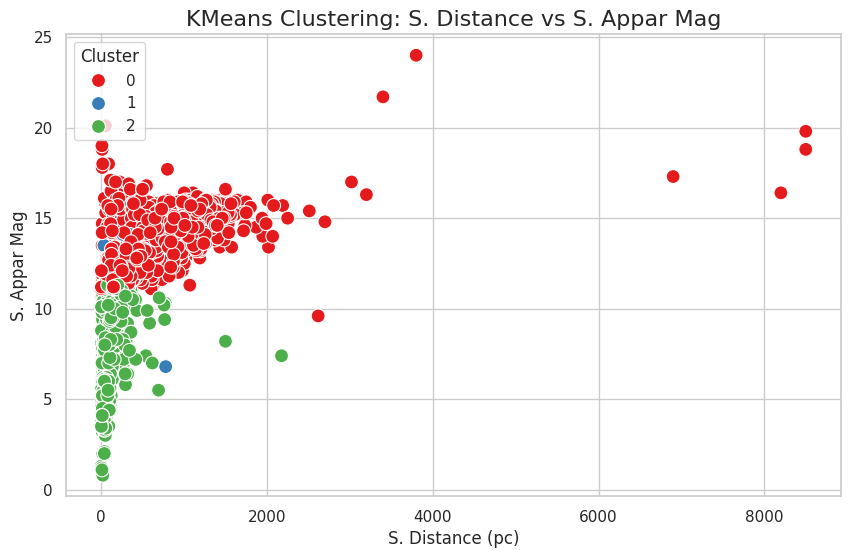

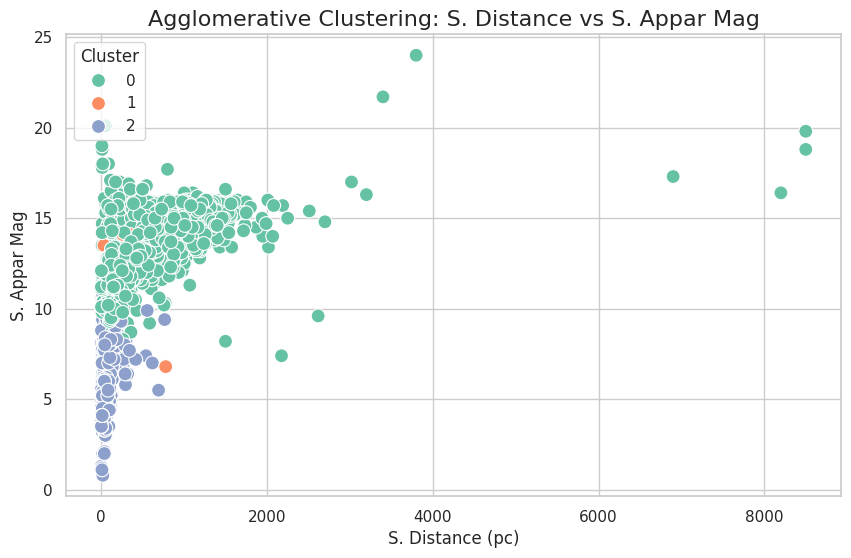

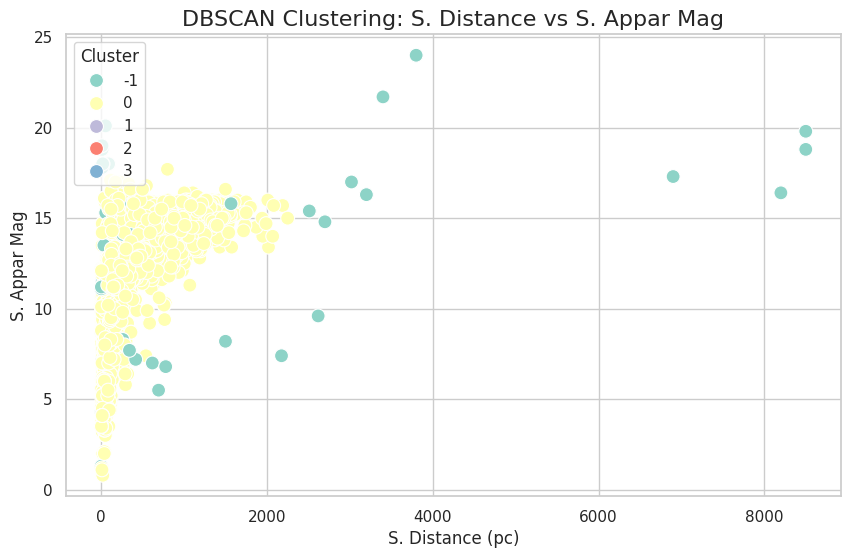

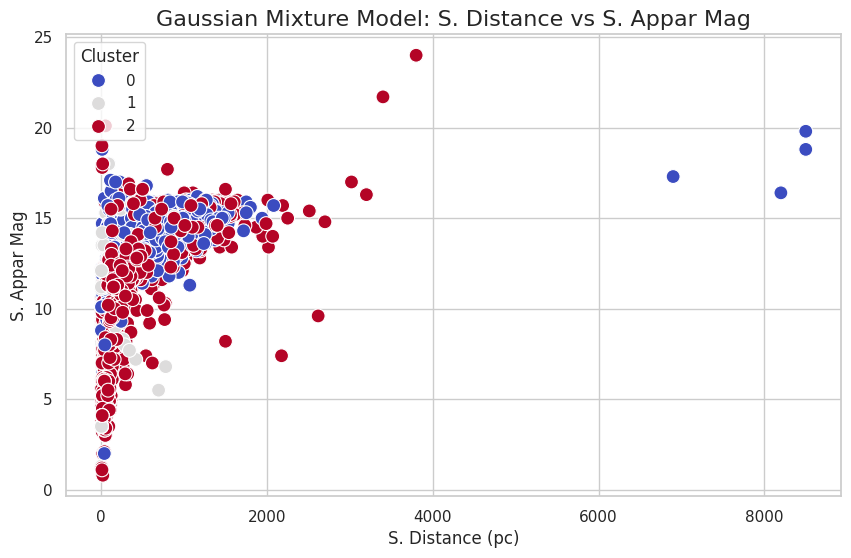

Davies-Bouldin Scores:
KMeans: 0.7902807567850546
Agglomerative: 0.7323999111856146
DBSCAN: 1.486196744669642
GMM: 2.0932771143709754


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
data = pd.read_csv('/content/PHL-EC.csv')

# Ensure column names are stripped of whitespace
data.columns = data.columns.str.strip()

# Select features for clustering
features = ['P. ESI', 'P. SPH', 'S. Distance (pc)', 'S. Appar Mag']  # Adjust as needed
data_cluster = data[features]

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
data_cluster = imputer.fit_transform(data_cluster)

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Initialize a dictionary to store Davies-Bouldin scores
db_scores = {}

# ======================
# KMeans Clustering
# ======================
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# Calculate Davies-Bouldin Score for KMeans
db_scores['KMeans'] = davies_bouldin_score(data_scaled, data['KMeans_Cluster'])

# Plot KMeans Results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['S. Distance (pc)'], y=data['S. Appar Mag'], hue=data['KMeans_Cluster'],
    palette='Set1', s=100
)
plt.title('KMeans Clustering: S. Distance vs S. Appar Mag', fontsize=16)
plt.xlabel('S. Distance (pc)')
plt.ylabel('S. Appar Mag')
plt.legend(title='Cluster', loc='upper left')
plt.show()

# ======================
# Agglomerative Clustering
# ======================
agglo = AgglomerativeClustering(n_clusters=3)
data['Agglo_Cluster'] = agglo.fit_predict(data_scaled)

# Calculate Davies-Bouldin Score for Agglomerative Clustering
db_scores['Agglomerative'] = davies_bouldin_score(data_scaled, data['Agglo_Cluster'])

# Plot Agglomerative Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['S. Distance (pc)'], y=data['S. Appar Mag'], hue=data['Agglo_Cluster'],
    palette='Set2', s=100
)
plt.title('Agglomerative Clustering: S. Distance vs S. Appar Mag', fontsize=16)
plt.xlabel('S. Distance (pc)')
plt.ylabel('S. Appar Mag')
plt.legend(title='Cluster', loc='upper left')
plt.show()

# ======================
# DBSCAN Clustering
# ======================
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust hyperparameters as needed
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

# Filter out noise for DBSCAN (-1 is noise)
dbscan_labels = data['DBSCAN_Cluster']
if len(set(dbscan_labels)) > 1:
    db_scores['DBSCAN'] = davies_bouldin_score(data_scaled, dbscan_labels)
else:
    db_scores['DBSCAN'] = None  # Can't calculate score if only one cluster

# Plot DBSCAN Results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['S. Distance (pc)'], y=data['S. Appar Mag'], hue=data['DBSCAN_Cluster'],
    palette='Set3', s=100
)
plt.title('DBSCAN Clustering: S. Distance vs S. Appar Mag', fontsize=16)
plt.xlabel('S. Distance (pc)')
plt.ylabel('S. Appar Mag')
plt.legend(title='Cluster', loc='upper left')
plt.show()

# ======================
# Gaussian Mixture Model (GMM)
# ======================
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(data_scaled)

# Calculate Davies-Bouldin Score for GMM
db_scores['GMM'] = davies_bouldin_score(data_scaled, data['GMM_Cluster'])

# Plot GMM Results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['S. Distance (pc)'], y=data['S. Appar Mag'], hue=data['GMM_Cluster'],
    palette='coolwarm', s=100
)
plt.title('Gaussian Mixture Model: S. Distance vs S. Appar Mag', fontsize=16)
plt.xlabel('S. Distance (pc)')
plt.ylabel('S. Appar Mag')
plt.legend(title='Cluster', loc='upper left')
plt.show()

# ======================
# 3D Visualizations
# ======================
fig_kmeans = px.scatter_3d(
    data, x='S. Distance (pc)', y='S. Appar Mag', z='P. ESI',
    color='KMeans_Cluster', title='KMeans Clustering: 3D View',
    labels={'KMeans_Cluster': 'Cluster'}
)
fig_kmeans.show()

fig_dbscan = px.scatter_3d(
    data, x='S. Distance (pc)', y='S. Appar Mag', z='P. ESI',
    color='DBSCAN_Cluster', title='DBSCAN Clustering: 3D View',
    labels={'DBSCAN_Cluster': 'Cluster'}
)
fig_dbscan.show()

fig_gmm = px.scatter_3d(
    data, x='S. Distance (pc)', y='S. Appar Mag', z='P. ESI',
    color='GMM_Cluster', title='GMM Clustering: 3D View',
    labels={'GMM_Cluster': 'Cluster'}
)
fig_gmm.show()

# ======================
# Display Davies-Bouldin Scores
# ======================
print("Davies-Bouldin Scores:")
for method, score in db_scores.items():
    print(f"{method}: {score if score is not None else 'N/A (insufficient clusters)'}")


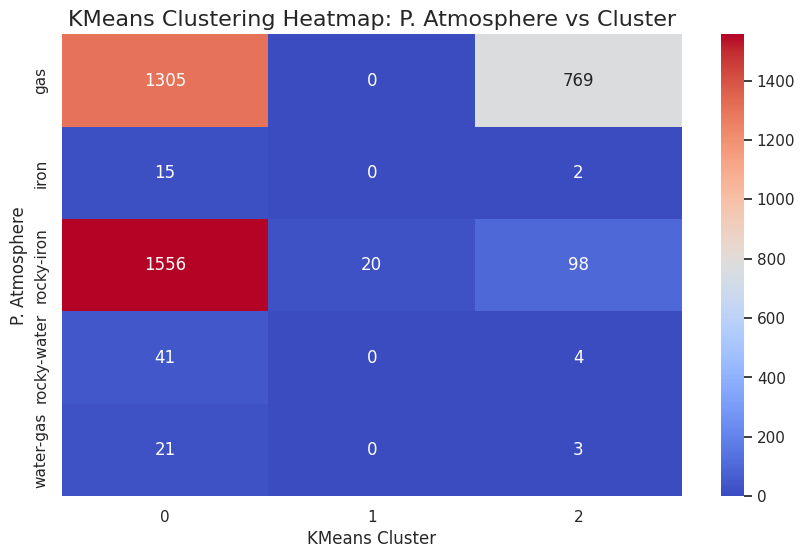

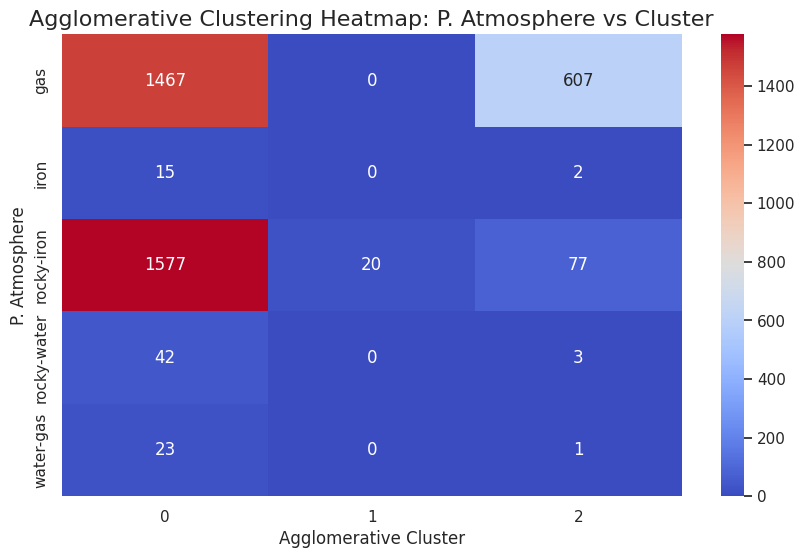

Clustering Evaluation Scores:
KMeans:
 Davies-Bouldin Score: 0.7902807567850546
 Silhouette Score: 0.41802085883410695
Agglomerative:
 Davies-Bouldin Score: 0.7323999111856146
 Silhouette Score: 0.42339876563363954
DBSCAN:
 Davies-Bouldin Score: 1.486196744669642
 Silhouette Score: 0.5935333386438567
GMM:
 Davies-Bouldin Score: 2.0932771143709754
 Silhouette Score: 0.13159065749154641


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
data = pd.read_csv('/content/PHL-EC.csv')

# Ensure column names are stripped of whitespace
data.columns = data.columns.str.strip()

# Select categorical features for clustering

# Select categorical features for clustering
categorical_features = [ 'P. Composition Class'  ,  'P. Atmosphere Class', 'P. Habitable Class',
                        'P. Zone Class', 'P. Mass Class'] # Remove leading space from 'P. Atmosphere Class'



# With:
encoder = OneHotEncoder(handle_unknown='ignore') # Remove 'sparse' argument

# If you need to control the sparsity of the output, you can convert it later:
data_encoded = encoder.fit_transform(data[categorical_features]).toarray() # toarray() for dense output

# Normalize the encoded data (optional, as one-hot encoded data is already
# Initialize dictionaries to store evaluation scores
db_scores = {}
silhouette_scores = {}

# ======================
# KMeans Clustering
# ======================
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# Evaluate KMeans
db_scores['KMeans'] = davies_bouldin_score(data_scaled, data['KMeans_Cluster'])
silhouette_scores['KMeans'] = silhouette_score(data_scaled, data['KMeans_Cluster'])

# ======================
# Agglomerative Clustering
# ======================
agglo = AgglomerativeClustering(n_clusters=3)
data['Agglo_Cluster'] = agglo.fit_predict(data_scaled)

# Evaluate Agglomerative Clustering
db_scores['Agglomerative'] = davies_bouldin_score(data_scaled, data['Agglo_Cluster'])
silhouette_scores['Agglomerative'] = silhouette_score(data_scaled, data['Agglo_Cluster'])

# ======================
# DBSCAN Clustering
# ======================
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

# Evaluate DBSCAN
dbscan_labels = data['DBSCAN_Cluster']
if len(set(dbscan_labels)) > 1:
    db_scores['DBSCAN'] = davies_bouldin_score(data_scaled, dbscan_labels) # Indented this line
    silhouette_scores['DBSCAN'] = silhouette_score(data_scaled, dbscan_labels) # Indented this line
else:
    db_scores['DBSCAN'] = None
    silhouette_scores['DBSCAN'] = None

# ======================
# Gaussian Mixture Model (GMM)
# ======================
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(data_scaled)

# Evaluate GMM
db_scores['GMM'] = davies_bouldin_score(data_scaled, data['GMM_Cluster'])
silhouette_scores['GMM'] = silhouette_score(data_scaled, data['GMM_Cluster'])

# ======================
# Visualizations
# ======================
# KMeans Clustering Heatmap

# KMeans Clustering Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
pd.crosstab(data['P. Composition Class'], data['KMeans_Cluster']), # Change 'P. Composition' to 'P. Composition Class'
annot=True, fmt='d', cmap='coolwarm'
)
plt.title('KMeans Clustering Heatmap: P. Atmosphere vs Cluster', fontsize=16)
plt.ylabel('P. Atmosphere')
plt.xlabel('KMeans Cluster')
plt.show()

# Agglomerative Clustering Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
pd.crosstab(data['P. Composition Class'], data['Agglo_Cluster']), # Change 'P. Composition' to 'P. Composition Class'
annot=True, fmt='d', cmap='coolwarm'
)
plt.title('Agglomerative Clustering Heatmap: P. Atmosphere vs Cluster', fontsize=16)
plt.ylabel('P. Atmosphere')
plt.xlabel('Agglomerative Cluster')
plt.show()


# ======================
# Display Davies-Bouldin and Silhouette Scores
# ======================
print("Clustering Evaluation Scores:")
for method in db_scores.keys():
    db_score = db_scores[method] if db_scores[method] is not None else 'N/A (insufficient clusters)'
    sil_score = silhouette_scores[method] if silhouette_scores[method] is not None else 'N/A (insufficient clusters)'
    print(f"{method}:")
    print(f" Davies-Bouldin Score: {db_score}")
    print(f" Silhouette Score: {sil_score}")

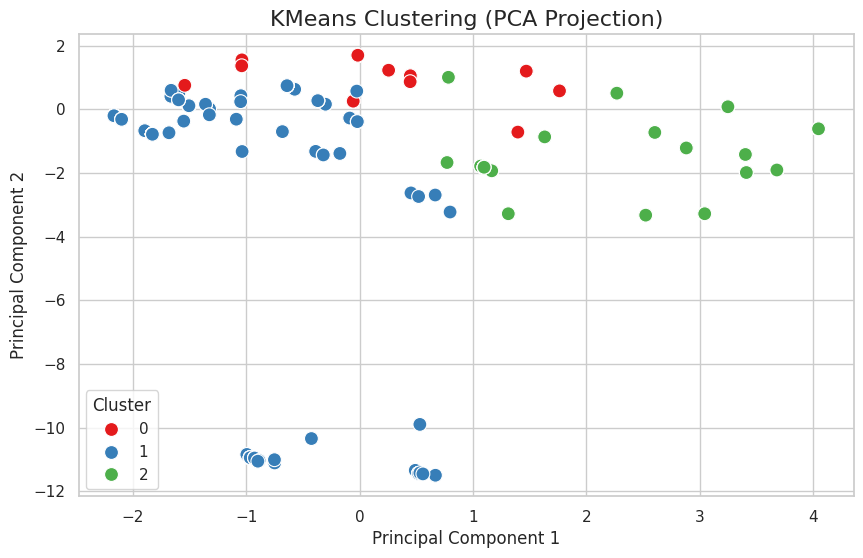

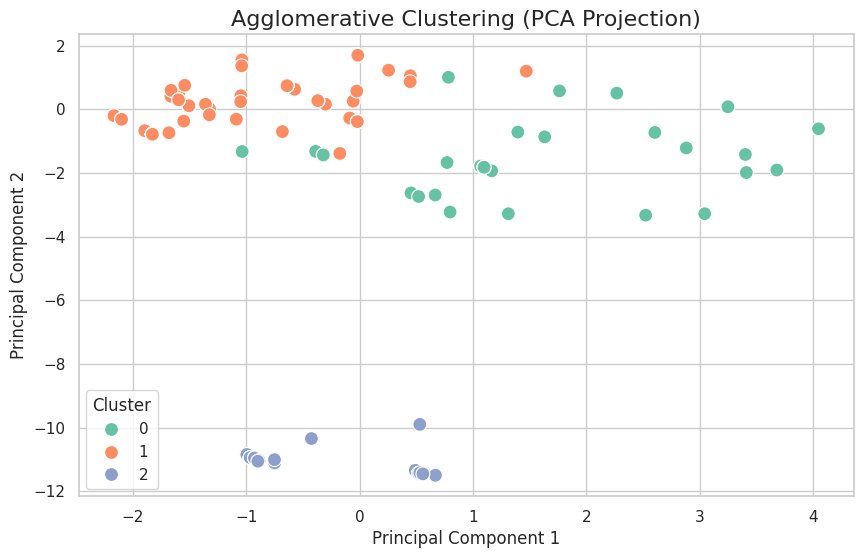

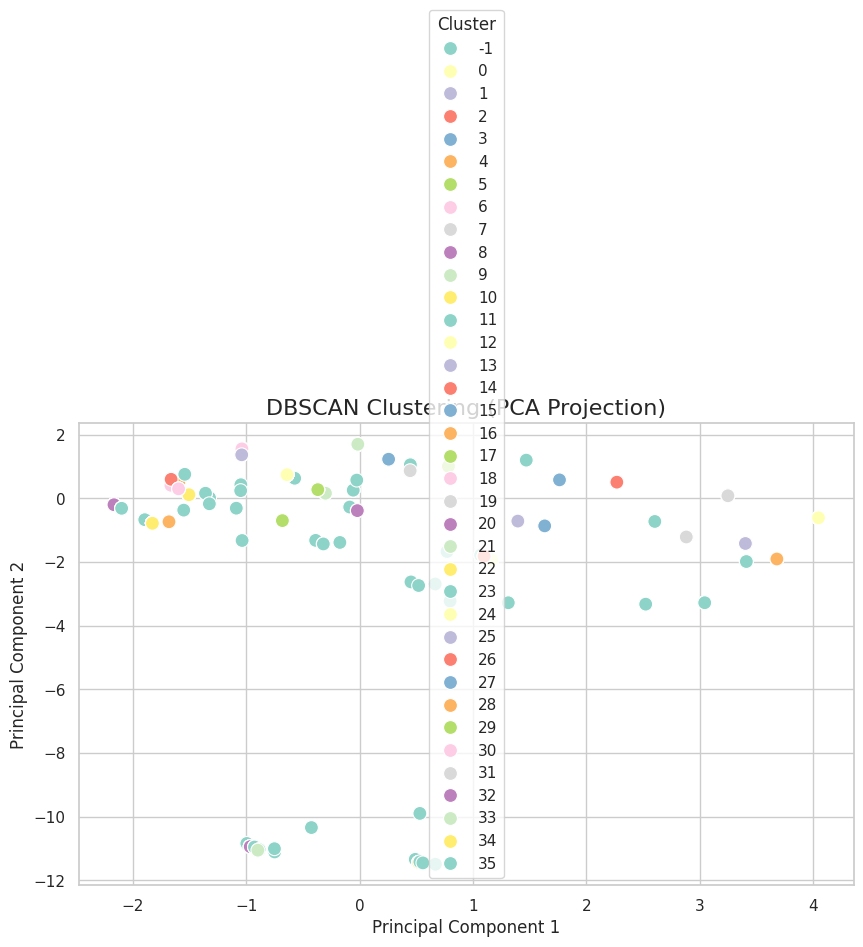

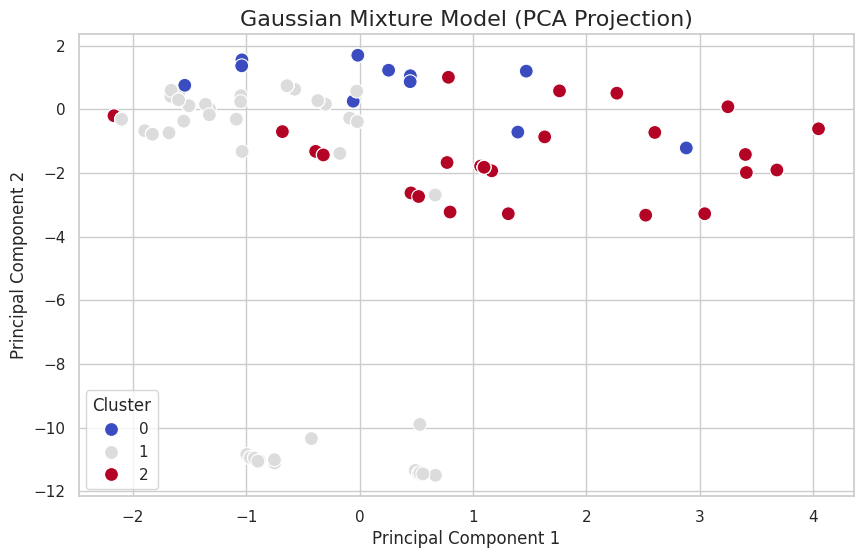

Clustering Evaluation Scores:
KMeans:
  Davies-Bouldin Score: 1.3896614946186272
  Silhouette Score: 0.33527999473123715
Agglomerative:
  Davies-Bouldin Score: 1.5277518704756288
  Silhouette Score: 0.32498448484637316
DBSCAN:
  Davies-Bouldin Score: 1.79191213754109
  Silhouette Score: 0.9684243246090142
GMM:
  Davies-Bouldin Score: 2.033023148088095
  Silhouette Score: 0.2561165444270006


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
data = pd.read_csv('/content/PHL-EC.csv')

# Ensure column names are stripped of whitespace
data.columns = data.columns.str.strip()

# Select categorical features for clustering
categorical_features = ['P. Composition Class', 'P. Atmosphere Class', 'P. Habitable Class',
                        'P. Zone Class', 'P. Mass Class']

# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # Remove 'sparse' argument (default False)
data_encoded = encoder.fit_transform(data[categorical_features]).toarray()  # toarray() for dense output

# Normalize the encoded data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Initialize dictionaries to store evaluation scores
db_scores = {}
silhouette_scores = {}

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# ======================
# KMeans Clustering
# ======================
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# Evaluate KMeans
db_scores['KMeans'] = davies_bouldin_score(data_scaled, data['KMeans_Cluster'])
silhouette_scores['KMeans'] = silhouette_score(data_scaled, data['KMeans_Cluster'])

# Scatter Plot for KMeans
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_2d[:, 0], y=data_2d[:, 1], hue=data['KMeans_Cluster'], palette='Set1', s=100
)
plt.title('KMeans Clustering (PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# ======================
# Agglomerative Clustering
# ======================
agglo = AgglomerativeClustering(n_clusters=3)
data['Agglo_Cluster'] = agglo.fit_predict(data_scaled)

# Evaluate Agglomerative Clustering
db_scores['Agglomerative'] = davies_bouldin_score(data_scaled, data['Agglo_Cluster'])
silhouette_scores['Agglomerative'] = silhouette_score(data_scaled, data['Agglo_Cluster'])

# Scatter Plot for Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_2d[:, 0], y=data_2d[:, 1], hue=data['Agglo_Cluster'], palette='Set2', s=100
)
plt.title('Agglomerative Clustering (PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# ======================
# DBSCAN Clustering
# ======================
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

# Evaluate DBSCAN
dbscan_labels = data['DBSCAN_Cluster']
if len(set(dbscan_labels)) > 1:
    db_scores['DBSCAN'] = davies_bouldin_score(data_scaled, dbscan_labels)
    silhouette_scores['DBSCAN'] = silhouette_score(data_scaled, dbscan_labels)
else:
    db_scores['DBSCAN'] = None
    silhouette_scores['DBSCAN'] = None

# Scatter Plot for DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_2d[:, 0], y=data_2d[:, 1], hue=data['DBSCAN_Cluster'], palette='Set3', s=100
)
plt.title('DBSCAN Clustering (PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# ======================
# Gaussian Mixture Model (GMM)
# ======================
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(data_scaled)

# Evaluate GMM
db_scores['GMM'] = davies_bouldin_score(data_scaled, data['GMM_Cluster'])
silhouette_scores['GMM'] = silhouette_score(data_scaled, data['GMM_Cluster'])

# Scatter Plot for GMM
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_2d[:, 0], y=data_2d[:, 1], hue=data['GMM_Cluster'], palette='coolwarm', s=100
)
plt.title('Gaussian Mixture Model (PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# ======================
# Display Davies-Bouldin and Silhouette Scores
# ======================
print("Clustering Evaluation Scores:")
for method in db_scores.keys():
    db_score = db_scores[method] if db_scores[method] is not None else 'N/A (insufficient clusters)'
    sil_score = silhouette_scores[method] if silhouette_scores[method] is not None else 'N/A (insufficient clusters)'
    print(f"{method}:")
    print(f"  Davies-Bouldin Score: {db_score}")
    print(f"  Silhouette Score: {sil_score}")


In [ ]:
from sklearn.model_selection import ParameterGrid

# Function to evaluate clustering methods
def evaluate_clustering(method_name, labels, data_scaled):
    if len(set(labels)) > 1:  # Ensure more than one cluster exists
        db_score = davies_bouldin_score(data_scaled, labels)
        sil_score = silhouette_score(data_scaled, labels)
    else:
        db_score = None
        sil_score = None
    return db_score, sil_score

# ======================
# KMeans Hyperparameter Tuning
# ======================
kmeans_results = []
for n_clusters in range(2, 7):  # Tune number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    db_score, sil_score = evaluate_clustering('KMeans', labels, data_scaled)
    kmeans_results.append((n_clusters, db_score, sil_score))

print("KMeans Results:")
for n_clusters, db_score, sil_score in kmeans_results:
    print(f"n_clusters={n_clusters}: Davies-Bouldin Score={db_score}, Silhouette Score={sil_score}")

# ======================
# DBSCAN Hyperparameter Tuning
# ======================
dbscan_results = []
eps_values = [0.3, 0.5, 0.7]  # Vary `eps`
min_samples_values = [5, 10, 15]  # Vary `min_samples`
for params in ParameterGrid({'eps': eps_values, 'min_samples': min_samples_values}):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(data_scaled)
    db_score, sil_score = evaluate_clustering('DBSCAN', labels, data_scaled)
    dbscan_results.append((params['eps'], params['min_samples'], db_score, sil_score))

print("\nDBSCAN Results:")
for eps, min_samples, db_score, sil_score in dbscan_results:
    print(f"eps={eps}, min_samples={min_samples}: Davies-Bouldin Score={db_score}, Silhouette Score={sil_score}")

# ======================
# GMM Hyperparameter Tuning
# ======================
gmm_results = []
covariance_types = ['full', 'tied', 'diag', 'spherical']
for params in ParameterGrid({'n_components': range(2, 7), 'covariance_type': covariance_types}):
    gmm = GaussianMixture(n_components=params['n_components'], covariance_type=params['covariance_type'], random_state=42)
    labels = gmm.fit_predict(data_scaled)
    db_score, sil_score = evaluate_clustering('GMM', labels, data_scaled)
    gmm_results.append((params['n_components'], params['covariance_type'], db_score, sil_score))

print("\nGMM Results:")
for n_components, cov_type, db_score, sil_score in gmm_results:
    print(f"n_components={n_components}, covariance_type={cov_type}: Davies-Bouldin Score={db_score}, Silhouette Score={sil_score}")


KMeans Results:
n_clusters=2: Davies-Bouldin Score=1.7972040549327535, Silhouette Score=0.3205975625050186
n_clusters=3: Davies-Bouldin Score=1.3896614946186272, Silhouette Score=0.33527999473123715
n_clusters=4: Davies-Bouldin Score=1.095022013114004, Silhouette Score=0.35853130339876815
n_clusters=5: Davies-Bouldin Score=0.9943447098703325, Silhouette Score=0.38681360593415043
n_clusters=6: Davies-Bouldin Score=0.9353564154134708, Silhouette Score=0.44969544939572875

DBSCAN Results:
eps=0.3, min_samples=5: Davies-Bouldin Score=1.79191213754109, Silhouette Score=0.9684243246090142
eps=0.3, min_samples=10: Davies-Bouldin Score=1.8608585238177102, Silhouette Score=0.9235845312106068
eps=0.3, min_samples=15: Davies-Bouldin Score=1.9018674941296614, Silhouette Score=0.9188414197309248
eps=0.5, min_samples=5: Davies-Bouldin Score=1.79191213754109, Silhouette Score=0.9684243246090142
eps=0.5, min_samples=10: Davies-Bouldin Score=1.8608585238177102, Silhouette Score=0.9235845312106068
eps=0